In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

In [28]:
symbol ="AAPL"
print('1.Apple  2.Tesla  3.Nvidia')
var = input('Enter the number of stock you want to predict :')
if var == 1:
  symbol = "AAPL"
elif var == 2:
  symbol = "TSLA"
elif var == 3:
  symbol = "NVDA"


1.Apple  2.Tesla  3.Nvidia


In [29]:
# Datasets
start_date = "2015-01-01"
end_date = "2021-09-30"

In [39]:
stock_data = yf.download(symbol, start=start_date, end=end_date)
data = stock_data[['Close'],['Date']].values

[*********************100%***********************]  1 of 1 completed


InvalidIndexError: (['Close'], ['Date'])

In [31]:
df = pd.DataFrame(stock_data)

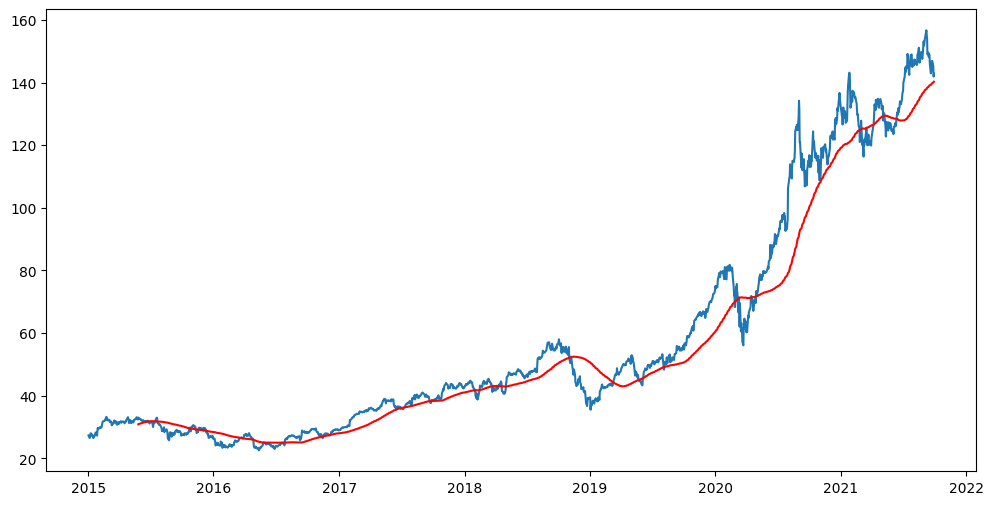

In [32]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
ma100 = df.Close.rolling(100).mean()
plt.plot(ma100, 'r')

In [33]:
# Scale the data using a MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [34]:
sequence_length = 60 # number of past days to consider
num_features = 1 # only using the "Close" column

In [35]:
# Split the data into training and testing sets
split_ratio = 0.8
train_size = int(len(data) * split_ratio)
train_data = data[:train_size, :]
test_data = data[train_size-sequence_length:, :]

In [36]:
# Create the input sequences and labels for the training set
X_train, y_train = [], []
for i in range(sequence_length, len(train_data)):
    X_train.append(train_data[i-sequence_length:i, 0:num_features])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [37]:
# Create the input sequences and labels for the testing set
X_test, y_test = [], []
for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i, 0:num_features])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [38]:
X_test

array([[[0.38863203],
        [0.37094069],
        [0.39595837],
        ...,
        [0.42226241],
        [0.42606542],
        [0.42203872]],

       [[0.37094069],
        [0.39595837],
        [0.37765186],
        ...,
        [0.42606542],
        [0.42203872],
        [0.42461128]],

       [[0.39595837],
        [0.37765186],
        [0.37040005],
        ...,
        [0.42203872],
        [0.42461128],
        [0.4248723 ]],

       ...,

       [[0.85518812],
        [0.87524704],
        [0.89060812],
        ...,
        [0.91916785],
        [0.92647552],
        [0.92714661]],

       [[0.87524704],
        [0.89060812],
        [0.9096231 ],
        ...,
        [0.92647552],
        [0.92714661],
        [0.91558848]],

       [[0.89060812],
        [0.9096231 ],
        [0.89970548],
        ...,
        [0.92714661],
        [0.91558848],
        [0.88978786]]])

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, num_features)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
41/41 [==============================] - 6s 31ms/step - loss: 0.0046
Epoch 2/50
41/41 [==============================] - 1s 31ms/step - loss: 2.9787e-04
Epoch 3/50
41/41 [==============================] - 1s 33ms/step - loss: 2.1827e-04
Epoch 4/50
41/41 [==============================] - 1s 33ms/step - loss: 2.1459e-04
Epoch 5/50
41/41 [==============================] - 1s 32ms/step - loss: 1.8854e-04
Epoch 6/50
41/41 [==============================] - 1s 31ms/step - loss: 1.7703e-04
Epoch 7/50
41/41 [==============================] - 1s 33ms/step - loss: 1.6253e-04
Epoch 8/50
41/41 [==============================] - 1s 32ms/step - loss: 1.5561e-04
Epoch 9/50
41/41 [==============================] - 1s 33ms/step - loss: 1.3286e-04
Epoch 10/50
41/41 [==============================] - 1s 31ms/step - loss: 1.2917e-04
Epoch 11/50
41/41 [==============================] - 1s 31ms/step - loss: 1.4242e-04
Epoch 12/50
41/41 [==============================] - 1s 33ms/step - loss: 1.24

In [ ]:
# Make predictions on the testing set
predictions = model.predict(X_test)

11/11 [==============================] - 1s 14ms/step


In [ ]:
# Inverse the scaling of the data
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

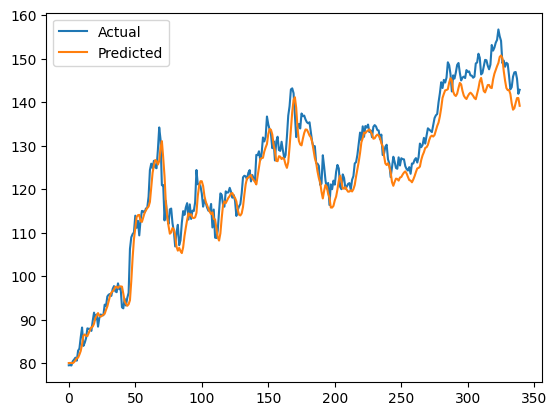

In [ ]:
# Plot the predicted vs actual stock prices
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.show()

In [ ]:
model.save('keras_model.h5')

In [40]:
pip install snscrape


                                              0.0/71.8 kB ? eta -:--:--
                                              0.0/71.8 kB ? eta -:--:--
                                              0.0/71.8 kB ? eta -:--:--
     -----------------                        30.7/71.8 kB ? eta -:--:--
     ---------------------                  41.0/71.8 kB 667.8 kB/s eta 0:00:01
     -------------------------------------- 71.8/71.8 kB 564.8 kB/s eta 0:00:00


In [42]:
import snscrape.modules.twitter as sntwitter

# Define the search query
search_query = "keyword"

# Scraping tweets
tweets = []
for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    tweets.append(tweet.content)

# Print the retrieved tweets
for tweet in tweets:
    print(tweet)

Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=keyword&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2ChighlightedLabel%2

ScraperException: 4 requests to https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=keyword&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2ChighlightedLabel%2ChasNftAvatar%2CvoiceInfo%2Cenrichments%2CsuperFollowMetadata%2CunmentionInfo%2CeditControl%2Ccollab_control%2Cvibe failed, giving up.

In [43]:
import snscrape.modules.twitter as sntwitter

# Define the search query
search_query = "keyword"

# Specify the number of tweets to retrieve
max_tweets = 50

# Scraping tweets
tweets = []
for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    tweets.append(tweet.content)
    
    # Check if the desired number of tweets is reached
    if len(tweets) >= max_tweets:
        break

# Print the retrieved tweets
for tweet in tweets:
    print(tweet)


Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=keyword&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2ChighlightedLabel%2

ScraperException: 4 requests to https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=keyword&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2ChighlightedLabel%2ChasNftAvatar%2CvoiceInfo%2Cenrichments%2CsuperFollowMetadata%2CunmentionInfo%2CeditControl%2Ccollab_control%2Cvibe failed, giving up.

In [45]:
import snscrape.modules.twitter as sntwitter
import time

# Define the search query
search_query = "python"

# Specify the number of tweets to retrieve
max_tweets = 50

# Scraping tweets
tweets = []
for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    print(tweet)

Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=python&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2ChighlightedLabel%2C

ScraperException: 4 requests to https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=python&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2ChighlightedLabel%2ChasNftAvatar%2CvoiceInfo%2Cenrichments%2CsuperFollowMetadata%2CunmentionInfo%2CeditControl%2Ccollab_control%2Cvibe failed, giving up.

In [2]:
import snscrape.modules.twitter as sntwitter
import time

# Define the search query
search_query = "python"

# Specify the number of tweets to retrieve
max_tweets = 50

# Scraping tweets
tweets = []
for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    print(tweet.content)

C:\Users\Matt\AppData\Local\Temp\ipykernel_26828\3311645251.py:13: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  print(tweet.content)


サークル淘汰した🎶　ので　サークル多めに　なる！自由に呟くぞー
python❓
• Multi-Linked List: A multi-linked list is a collection of nodes where each node can have multiple links (pointers) pointing to other nodes in the same or different lists.
• Circular Linked List: A circular linked list is similar to both a singly and doubly linked list, with the exception that there are no terminating nodes. Instead, the last node in the list points back to the first node, creating a continuous loop.
できればPythonは
データ分析試験、実践試験ともに
誕生日までに合格したい。
んでスッキリして次の試験へ
進みたいな(  ´﹀` )
• Doubly Linked List: A doubly linked list is similar to a singly linked list, with the exception that each node has two pointers - one pointing to the previous node and one pointing to the next node.
• Singly Linked List: A singly linked list is a collection of nodes where each node has one pointer pointing to the next node in the list. The last node in the list points to null.
Types of Linked Lists:
6月6日学習報告

取り組んだ問題数:2(M)
使用言語:python

 https://t.co/sqxeJSjGQh #R

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88c4cad75877ddb'


@proutpouetflope @lePlaymobil28 @AliBenBelgacem9 @TheKeeper46 @CNEWS @LeParisien_75 @franceinfo @BFMTV @LEXPRESS Vous n'avez rien prouvé du tout. Il faut agréger les données pour ça. C'est facile à faire avec Python ou powerBI
VÍDEO NOVO NO CANAL!
Um estudo finalmente revelou o maior mistério do Monty Python: "Qual é a velocidade de vôo de uma andorinha sem carga?"

E a resposta vai te surpreender: https://t.co/ovTUw0XVLP https://t.co/pYqYFC6xDP
@JesseKellyDC Being single isn't the insult you imagine it to be 🤣 Some of us don't require a man to give our lives meaning, but nice try! Besides, you should bone up on your Monty Python; her comment will make SO much more sense.
@By_jperez Creo que en unos meses más, le meto a Python... le veo potencial para lo que hago
@JuanmiGG_News Ya sabes lo que decían los Monty Python

Todo esperma es sagrado
Todo esperma es importante
Si un esperma se desperdicia
Dios se enfada mucho
 
 https://t.co/u04hVQs6oB
pythonが強いのか
@1222hime なるほどです。
「Pythonの環境設定

Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

@crazygolub Було б більше толку.
#ChatGPT #Developments #Devs #Coding #AI #DataScientist #DataAnalyst #CodeRunner #ChatBot #ArtificialIntelligence #MachineLearning #DataScience #DataAnalysis #Programming #Python #JavaScript #Java #CSharp #Ruby #PHP
Monty Python knew it was coming… https://t.co/FEs0EKuGJ3
@193sakuracream くりーむちゃん😍
もちろん ご挨拶させてー！🥰🥰🥰
@utsukushiinabi @herarkives for starters check mo mga free courses sa coursera, edx, udemy or freecodecamp. start ka sa excel, sql, python, r, google data analysis.

and if you wanna deep-dive:
🔗. https://t.co/rNZNxUYERc
🔗. https://t.co/JhTxr3oh0y
🔗. https://t.co/oaXg9BixUg

hope it helps!
@multithread_cat @Carthagodelend Во многих языках с Promise-like объектами для асинхронщины это делается через обращение к экзекьютору:

executor.block_on(future) 
- В Rust
- В C++
- В Java тоже есть блокирующий get() 
- В Python (https://t.co/pLkfRPJ45s_untill_complete) 
- В C# task.Wait()
3軸グラフpythonで作れるのかな🤔まだnumpyとmatplotlibやらを使ってscatterで遊んでる最中...
@sho1823

Skipping unrecognised entry ID: 'promoted-tweet-1653785610820153344-88c522474b3d233'


My Review of The Rat In The Python: Book 1 The Home by Alex Craigie #nostalgia #humour #Memories #TuesdayBookBlog https://t.co/Mf08wMaxJy via @judithbarrow77
If you want to know more about Towncrier, I’ve recently talked about it on Test &amp; Code 202: https://t.co/xHs5KpazrO (the episode is a bit longer because @brianokken &amp; I diverge into a few other topics including Python packaging [of course]).
Te voy a "prestar" un par de minutos para leer este OFERTOTE de la gente de @Prestalo_online 🤑

Si tienes experiencia con #JavaScript o #Python y quieres participar en la toma de decisiones técnicas, este es tu lugar

[€40-45K | Barcelona y 90% Remoto]
https://t.co/8BuyLuYzRf https://t.co/GU4Cb1JeHM
🤔🤔🤔

なんで、docopt(0.6.2)パッケージ入れてるのに、モジュール認識されないの？🤔
詳しい方教えてくだしあ🥺

ちなみに、Pythonは3.10です

#とーふの独り言
#Python 
#docopt https://t.co/w2QUu6GOhP
@swapnakpanda @SaveToNotion #thread #python
@T_TDrakoT_T @crlhsales Orgulhoso por entender isso 🥹
Apesar de preferir python.
Add structure to your Python logs

Skipping unrecognised entry ID: 'promoted-tweet-1665703126605910019-88cb9490c16c5b7'


昔Pythonの環境の記事書いたなと思って見たけど、昔過ぎて古かった
TRAINING: We've released a final few places for our Advanced #Python #training course, delivered virtually over short morning sessions. 

We'll be exploring advanced features to develop bigger or more complicated programs.

⏰ Register by 14 June 2023
➡ https://t.co/RN4hmCDlxF https://t.co/IF8sclEbJl
文字列からこの文字列はpython語で書かれてると解釈してくれるやつがインタープリターってやつか
A Data Scientist's Dream: Python, Big Data, Multi-Processing, and PyCaret https://t.co/P7SME4SK4a
Get online class homework, assignment and exam expert help with
Calculus
Statistics
#essaypay 
#Assignmentpay 
#onlinelearning 

#Onlineclasses
#Econometrics
#javascript 
#100DaysOfCode
#Biology
#Python
#programming
#CollegeStudent
#Coding
#USA #Canada #Australia #UK #Kuwait #UAE
C言語の場合はめんどくさいルールばっかだったのでよかったけど、JSとかPythonとかその辺の言語って変数の宣言クソあいまいだったりするので
@Kynsofficial I wish to learn Python programming can you pitch in pls
@doglishinu @python_fili @iambroots @JeffKirdeikis
@anayitsul Anjayyy ngoding pake python untuk

Skipping unrecognised entry ID: 'promoted-tweet-1653785610820153344-88c7493bdf5a0d2'


I am 100% reliable and trusted you can contact me now for any hacking or recovery problems #MachineLearning, #DeepLearning #ComputerVision #python #NFTs #facebookdown #Assigments #Datavisualization #snapchatleak #snapchatdown #SnapChat #instagramdown #telegram
#Python Django Tutorial - Web Code Geeks - 2023 https://t.co/eGwSbtxKRq
Get online class exam help in
#Paper
#python
#homeworkdue 
#chemistry
#Onlineclass
#Essaypay
#Econometrics
#Statistics
#homework
#essaywrite
#Essayhelp
#Casestudy
#Javascript
#Maths 
#Philosophy
#Calculus 
#Repair

#UK #USA #UAE #SAUDIARABIA #KUWAIT #CANADA #AUSTRALIA #NEWZEALAND
il faut que je passe tout ce que j'ai fait en IDL vers python j'en ai marre de ce langage
𝗚𝗶𝗮𝗻𝘁 𝗕𝗮𝗻𝗮𝗻𝗮 𝗢𝘃𝗲𝗿 𝗧𝗲𝘅𝗮𝘀

Thirty-one short stories for lovers of absurd comedy; Monty Python meets Douglas Adams meets Salvador Dali.

https://t.co/fEvmGucFAl

@mknutter33 https://t.co/tUjqEvnpYo
@pasochkapan @Ivanhoe_1192 Діду треба консультація? Не питання. Досвід роботи з дідами тєж є.
#学習記録



Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

#DataScience #DataAnalytics #coding #r #Python #computer #education
I am at your service for Any Account Recovery and Hacking now
#snapchatdown #DataScience #DataScientists #CodeNewbies #Tech #deeplearning #Python #Coding  #javascript #rstats #100DaysOfCode #programming #Linux #IoT #IIoT #BigData #gmaildown #SNAPCHATLEAKED #ROBLOX #Discord
@Python_Fan @xkcd I've had a neat marble roll idea mothballed for years.
DM me now 
#RobloxDown #DataScience #DataScientists #Tech #deeplearning #CyberSecurity #Python #Coding  #javascript #rstats #100DaysOfCode #programming #Linux #IoT #IIoT #BigData
Check out mine and @HiralNaik25's latest work. We looked at the relationship between python body lengths and dietary preferences. 

Open access at Journal of Zoology

https://t.co/fWavwv5au7 https://t.co/I6YSXmalQa
Rambura na @VoiceofToro 
In 2017, the body of a dead Indonesian man was discovered inside of a reticulated python. This was the very first case of an adult human being eaten by a snake. The c

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88c652c7235e0d6'


🐍🚀 Ready to embark on your Python programming journey? Check out this comprehensive guide that covers all the essentials and gets you started with Python programming! Start coding in Python today! #Python #ProgrammingGuide #Coding101 #ALX_SE 
@hashnode https://t.co/rWOxojrdqJ
Yyyy... Seguimos practicando! #Python #Hive

https://t.co/UH4zVqRpmT https://t.co/wftPWQ0i9B
Python講座。「インストールしておいてね」とお願いしたのだが，「できなかった」と講義始まってから言われ(いや医学部で他の講義だとまずいと思うぞそれ)，対応したので最初は「パソコン教室」状態。そう言ったらみんな笑っていた。スタッフが教授ともう一人以外集まってしまい，誰向けだか微妙に。
@TheJackForge That’s awesome dude, hype him up, it’s worth it. My 10yo has been building in Roblox Studio and Blockbench (Minecraft) for the last few years and has loved it. He’s been learning Python &amp; Java for random things too but obv that’s tougher to just run with. Love to see it! 🙌
おpython
7 must-stream movies on Netflix in June 2023 https://t.co/YTMQyrCkf2 #programmer #python #tecnologia #iot #computerscience
Yesterday, two of our talented colleagues, Juanmi Gabarrón and 

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88c221c2739a2d6'
Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-88cd2b8e1e6c93c'


@NOS Oorlogspropaganda-machine draait op volle #NPO toeren. Gesponsord door @VVD en vooral de fanatici/fundamentalisten van @D66
@OERRBlog BBC hat Gebühreneinnahmen von GBP 3.8 Mrd. 

Regelmässig Topformate von Monty Python, Sherlock bis The Office, plus Radio World Service. 

Wir hingegen müssen unsere Demokratie stabilisieren. Klar kostet sowas mehr.
@margaret_japone ハローワールドって言うと、映画より先にC言語出てくるあたりがもうやばいねん……(ｶﾞｯｶﾘ)

Pythonちゃん、わしと仲良くしてくれるかな……でもわし最弱コアのノーパソしか持ってへんから爆発せぇへんかな
@TygodnikNIE Zanim dojdziemy do poziomu hipokryzji level hard, to już wiemy, że chłopaczyna nawet nazwiskiem dokłada puzzle do tej układanki. Monty Python wpada w kompleksy.
@Kim67670594 @Tamarindos9 You win with a Month Python reference. LOL.
BracingEvoMixという画像生成AIを使いたいのですが、.jsonファイルがないとpythonでエラーがでるのですが、どこにあるのか教えていただけたりしますか？

#BracingEvoMix
#AI画像生成 
#ChatGPT
@Harryboithedumb dude why does stuff like this involving jumpman affects you so much 😭, can't you just ignore if you don't like it??
The except block is where yo

Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

@christ_bink @bimbitron @Nebuchanedzar_I Bisa pasang derby,python 😎
もう1回。
#zkTwitFi
Securing PyPI accounts via Two-Factor Authentication

PyPI will require all users who maintain projects or organizations to enable one or more forms of two-factor authentication (2FA) by the end of 2023.

https://t.co/BSKiSeTt91
@ABABC_tec 意識が生存に都合良かっただけ
7 Course-Bundle: Shut Up and Code Python + PyCharm + Coding Interview + Machine Learning + One-Liners + Regex + Lambdas https://t.co/qLyKmvMKnN is the featured Track on the Leanpub homepage! https://t.co/7B8N80eFd1 #courses
#Python
Lets talk about Python.
I find myself using more of python in my job role.  which is really interesting, don't worry I still love SQL (my first love😁). 

Today I will be sharing a few out of the many libraries in python, especially the ones I use more.…https://t.co/RVkhHv3ikx
¿Quieres rastrear un teléfono perdido?
Romper iCloud??
¿Acceder a los correos desde cualquier Gmail objetivo?
#BigData #Analytics #DataScience #AlI
#Mac

Skipping unrecognised entry ID: 'promoted-tweet-1662093835273396226-88c6aeec3c8191f'


🦄 ZoomInfo is hiring Senior Team Lead 

🌇 Israel 
💪 #python #aws #gcp #sql 

#tech #softwareengineer #jobs 
https://t.co/sJmjde9HRb
@ricobert11 😤😤😤
@AlicjaDef @TVN24BiS ❤️
なぜ音階は「12」なのか？数学で解説（ときどきプログラミング、Python）和音の不思議を三角形で解説！ピタゴラス音律と平均律など音楽を数学でわ... https://t.co/Ij5QuigThC @YouTubeより

面白いから見て❤️
Also, if you spend more time documenting your Dockerfile and python venv setup than the actual logic of your code, NGMI. You can clearly spot an enterprise engineer by the ratio of core logic : Dockerfile, `readme` documentation
イベントマッチでウキウキしながらバイトやり始めたんだけど、WAVE3で通信状態が悪いで−20下がって、結局合計3回通信状態が悪いでランク達人に下がった…
イベントマッチのせいなら2度としないで欲しい！！笑
Why do software developers keep looking for new jobs? What keeps programmers happy? 😃 We are proud to say that Divio enjoys a remarkably low turnover of technical team members. Here is how.

#Programmer #OpenSource #Python #SoftwareIndustry #CSR 

https://t.co/L4cUOe1DEe
@lpdahito Python
Recuperar bloqueado/perdido...
MD para AYUDA..
#usahackers #canadahackers #nuevayork


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88c4afa110648b4'


今日やれたこと
■勉強：FP2級
■勉強：基本情報技術者
■勉強：プログラミング(python)
□e-タイピング
□筋トレ
I am ashamed of myself.
python pls https://t.co/02S6OeAix5
@tantan_python それに関してはノーストレスになることは間違い無いです👍
きっと奥様も納得する製品だと思います😊
Même en python je me suis fait tuer, chatgpt ça marche pas en entretien
@KirkDBorne @SaveToNotion #Thread #Python
Our Wine &amp; Code: Intro to Python wrkshop is just a few days away! We can’t wait to connect with like-minded tech professionals, share ideas, and learn from experts in the field. See you there! https://t.co/wBVvPCJOJW #womenintech #wocintech #diversityintech #Python #winelover https://t.co/x26i57nxRR
@faineg A Python telegram bot can do this in a few lines with the Telethon lib. You can then store it where you want (dropbox, your own hard drive, a vpn, etc)
コピー用紙で同人原稿は可能です。
@elendilions @artistfuly A little Tolkien a little Monty Python
Day 10 of #30daysofPython

Topic: OpenCV in Python
With the launch of Apple Vision Pro, I'm exploring OpenCV in Python today! computer vision, image proces

Skipping unrecognised entry ID: 'promoted-tweet-1663201714403418114-88ca153e807eeda'
Skipping unrecognised entry ID: 'promoted-tweet-1664542366726799360-88c6df10ec4dd32'


@bob_python ゲームボーイ持った猿みたいだね🐒
SQL ✅ 
SAS ✅
Python ✅ 

💪🏻💪🏻💪🏻
@pulte i accept dogecoin
What Programming Languages are used for Cryptography? Various programming languages are utilized for cryptography, including Python, C/C++, Java, and Go. These languages offer developers a wide array of tools and libraries to effectively...
https://t.co/MnwKzcqgkj
#programming
@glennsumi @globeandmail @TorontoStar I also went under duress from my husband and his bff who are Monty Python fans. Ended up having a great time. Missed Eric Idle the night before unfortunately.
Conjunto de ferramentas que uso em projetos mobile de pequeno ou médio porte:

Front: Flutter
Backend: Firebase (as vezes Back4App)
Scripting: Python
API: NodeJS/Functions
Push: OneSignal

Mais que suficiente pro contexto.
@tantan_python サーモがすごく優秀なんだと思います。
サーキュレーターの上下の温度差も0.5℃以下なのでかなりオススメです。
それなりの価格はしますがそれ以上の価値はあると感じてます👍
Do you have pending work that you need assistance..I am a freelancer with intensive experience in writing assignment.

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88c35b2475f1200'
Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-88cebc2aff89bad'


Simon the ball python often has the option to use this special enrichment wall. With its climbing and perching options, the wall offers Simon an environment full of meaningful choices and safe challenges. This helps them be at their best, both physically and mentally! https://t.co/T3w1TAOYp6
@python_lady シュシュ足に巻いてるみたいww
可愛い😍
Pythonわからんちんちん
✋ Temporal Technologies is hiring Senior Software Design Engineer  

💰 USD 175k-225k 
🛖 #remote #wfh 
💪 #python #java #go #golang #node 

#tech #softwareengineer #jobs 
https://t.co/1lnbsfqvVW
@G_Cube_R 想像以上ですわ…
来年イキます！
@chinawe_1 UNFOLLOW NOW!
@python_spaces @rattibha
The Ukrops couldn’t convince their puppet masters their planned great counter offensive was doomed, so they had to take matters into their own hands and sabotage the winter, spring, summer, fall, winter, spring, summer great offensive. Monty Python is running this clown show.🤡
BTCは三尊ネックライン25800ドル付近を少し割り込んだ辺りまで下落。
25000ドルも割り込んだ場合、21000ドル付近まで下げる可能性あり。
@MMru_programmer どれでもないときにも使えます。ほんのリ

Skipping unrecognised entry ID: 'promoted-tweet-1663201714403418114-88c3f2166ad3299'
Skipping unrecognised entry ID: 'promoted-tweet-1664542366726799360-88c31b31cd5b825'


อยากเรียนpython แต่ก็ขก.เหลือเกิน แง🫠
trying to mod 3DS 

use seedminer variant

get to the part where now all i have to do is let python mine and get to offset 1500

2 hours later

offset is at 64

something is wrong, i think my GPU may just sucks balls but idk
@Yourpop8 GM mr RFD
#Infographic - Efficacy of #DevOps for the modern organization!

Via @zConSolutions

#DigitalTransformation #Cloud #AWS #Programming #CloudComputing #Technology #Innovation #Developer #Linux #Python #Coding #Azure #Software #IoT #CyberSecurity #Kubernetes #HTML #CSS #Serverless https://t.co/QmREq2BCOc
Want to transform your career for a brighter future ahead?
Master the skills from the industry experts at 3RI Technologies and learn to see the hidden patterns and insights in data with #Python.
Check: https://t.co/ibgN5xMzZC
Call: +91 8308103366
#DataScience #pythondeveloper https://t.co/PrE1qaHZ6Y
@para_blogger 白虎隊の会津に遊びに来てください。
@WatcherGuru panic selling incoming
Find out more about the modern #python stack 

Skipping unrecognised entry ID: 'promoted-tweet-1663201714403418114-88cacb6c598185e'


Miss
@Zoey28171134 hello zoey i saw your twee concerning your stolen usdt, I recommend you send a DM right away, there a good chance we can recover your stolen funds.
@Preethamvarma14 @messirohitajith @ESPNcricinfo No bro the entire squad actually were said to be ready by captain,coach and staff. Because they don't know what they get first (bat or bowl) based on that they'll analyse what players are required on last day '5' to defend or chase the target 🎯. I think you understand.
No se cuánto paso, pero creo que tengo que seguir practicando Python. Jsjsj https://t.co/YWc8mGvDav
AutoDiff: #Mathematics for Machine Learning. #BigData #Analytics #DataScience #AI #MachineLearning #IoT #IIoT #Python #RStats #TensorFlow #JavaScript #ReactJS #GoLang #CloudComputing #Serverless #DataScientist #Linux #Programming #Coding #100DaysofCode  
https://t.co/TxF5n6l128 https://t.co/pn8l5CboHQ
What's Microsoft AI? #BigData #Analytics #DataScience #AI #MachineLearning #Azure #IoT #IIoT #PyTorch #Python #R

Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

ただFlaskうまく動かんので、Python環境を再構築してる。Anacondaのアンインストールがなかなか終わらない・・・
"we're getting there" instead make bro carry laptop begin dey learn python
本日仕事が公休日だったのでやりたいことがありましたが、家族の不満解決に奔走し、なんだかそちら優先で間違いなかったと、穏やかでいます。
薄皮をはぐように、幸運がやってきているようで、気持ち良く眠れそうです。
つながりができたみなさん、今日もありがとうございました。
爆音映画祭ですた
Neural Network Embeddings Explained. #BigData #Analytics #DataScience #AI #MachineLearning #IoT #IIoT #Python #RStats #TensorFlow #Java #JavaScript #ReactJS #GoLang #CloudComputing #Serverless #DataScientist #Linux #Programming #Coding #100DaysofCode 
https://t.co/F3ExfUwdzN https://t.co/5XX6eRf1iJ
I found an awesome website if you're learning Python for data science specifically.

What's included: data structures, code testing documentation, NumPy and Pandas for data exploration and analysis, etc.

https://t.co/f8TWBB38HE https://t.co/pYWlcSKCJb
You can take the intermediate Python course @Datacamp which gave a straightforward introduction that was very easy to comprehend. I also took the 'Python Dictionaries a

Skipping unrecognised entry ID: 'promoted-tweet-1663201714403418114-88c688d90c1ef49'


In this exhaustive guide, explore the key differences between Node.js and Python.

From performance and speed, to application use cases, find out which programming language suits your needs.

https://t.co/YvQYFlzjRH
Want to calc ECAPE (via @UpdraftwMax et. al.) in Python? I released a @Metpy-rich module on PyPI!

simply: pip install ecape

If there's interest, I'll add a CLI for .nc &amp; .csv, but I wanted to share to #wxtwitter for #Juneing.

See the docs for more info: https://t.co/gbUUTiT093 https://t.co/KpTBG2KOlG
Automatically calculating value over several tables with Python #GISStackExchange https://t.co/4AQayyzeuc
Pythonは私の中で高速スパゲッティ製麺機であるとされている
@pyoipyoi_python 美醜の大地も読んでます！
小さい頃から大人向けの漫画ばかり読んでいたので(ビッグコミックとか)、これぐらいの話はまだ可愛いものだと思って読めるんです🤣
金瓶梅は途中で挫折しても、続いてるのでまた挑戦してしまうのですよね…
原作にも手を出しましたが、こちらは即リタイアでした😅
あしたrrrの爆音上映いくよ🔊🔊
An Athlete Wrestling with a Python, sculpted by Lord Frederic Leighton.
それは、今や大したことはない。

素質がそこにはなかっただけ。

でも、Pythonはできるからさ。
Discover the intersection of #AI and @Elix

Skipping unrecognised entry ID: 'promoted-tweet-1665703126605910019-88cf1b086fb3f36'


What's a monad? ~ Jason DeLaat. https://t.co/w7FLthakSB #Python #FunctionalProgramming
@callit_winwin @manishkumarttp @rishibagree Yeh bhi WhatsApp kya https://t.co/91IwaRbWRK
@grandfathertok1 布かぶせるわ！
PythonでSUUMOをスクレイピングして賃貸物件情報を収集する方法について解説しました

短いコードでスクレイピングできてしまうPythonはやっぱり最強です

初心者でも学びやすい言語なのでオススメです
#駆け出しエンジニアと繋がりたい #Python #プログラミング初心者 
https://t.co/2sWPb3zSoE
What's the best newsletter platform right now?

✅Beehiv?
✅ConvertKit?
✅Substack?
✅Mailchimp?

I used Revue until it closed, and I really need to up my techtwitter newsletter game. Thoughts?

#DevOps #SoftwareDeveloper https://t.co/ffhvOZeEpt
CongratulationsPrasath .E for getting placed as a Software engineer from Besant Technologies Tambaram Branch, Chennai💐💐💐 .
He Completed Python full stack Course in Besant Technologies Tambaram Branch.
#BesanttechnologiesTambaram #Placements https://t.co/AriD0pB0pJ
@tantan_python 奥様はクモが嫌いなのよ🤣🤣🤣
💥🏍️@Honda's Self-Balancing Concept Represents the Epitome of the #Future of Motorcycling
https:

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88c46783f6fc6bf'
Unavailable user in card on tweet 1666055693692989441
User 1616528732407169027 not found in user refs in card on tweet 1666055693692989441


Ruby全然使わなくなってしまったな、と言うことを思い出した。使用感的にはGoの次くらいに好き。ただ、汎用ツールがRubyで書かれることが少なくて、JS,Java,Pythonとかに行ってしまう。
@TeksAcademy Python. It is one of the highly demanded course and easy to learn as well.
Python Article of the day🐍:

Working with Stacks in Python

https://t.co/k2RJHmgrfp
ต้าวฟามร๊าก https://t.co/cEW7NRP9iw
これを見たらできそうな気がしちゃうでしょ。
@Cryptodaave @CamelsNFT Thank you King and you too! ❤
you don't want my love?
(งานเรารัใหม่ค่ะ) https://t.co/P4BUiZL5tm
Exploring the dynamics of mobility through the power of heat maps &amp; python by Manuel R. Uhlig https://t.co/QFkVNxguoA
@cfhinor @SpookyScaryAnna «Marguerite Tatierre » ça me rappelle le sketch des Monty Python avec «Hilter » 😂 https://t.co/R3ZV3s4Iss
@pvallin Mientrasperrosanxe acaricia un gato en su sillón. Lo que nos queda por ver estos tres días. Menudo  festival, los Monty Python se quedaron cortos https://t.co/bmtY0YEbT9
pythonに魂を売ろうか検討中
@saburtalos Бо за 5 годин після публікації було АЖ 13 вподобань. Після пропиздочика все стало як треб

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88c41156a510c26'


Which programming language should you start learning first?

a. Python
b. Java

Comment below with the reason behind choosing your  first programming language.

#programmer #learning #coding #teksacademy #LanguageLearning #informationtechnology
This summer, let your child embark on an exciting Python coding adventure with Codetoday!🌞🎉 In our latest blog we look at what we have to offer students looking for a week of coding. #summercourses https://t.co/keWV41ji6W
Monty Python's Flying Circus
@denachtzuster Nee.
Building a Single Page Application with Python and Pyodide - Part 1 

https://t.co/jyhxXM4Nr2

Create an application that fetches data from a remote file, manipulates the data with Pandas, and renders it in the browser.

by @amirtds

#Python @Pyodide #Pandas
Mengenal Python dan PyTorch: Bahasa Pemrograman di balik Kecerdasan ChatGPT https://t.co/BF4zKjtZAF
TIL: Keine Objekte in ein python set stecken, für die man keine __eq__-Methode implementiert hat! (__hash__ reicht nicht)
@ig

Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

#developer #programmer #coder #javascript #python #html #java #css #webdeveloper #technology #codinglife #computerscience #software #webdevelopment #tech #softwaredeveloper #webdesign #php #programmers #development #web #linux #softwareengineer
HappyTue☀️ https://t.co/cwbT7Gx9Zo
In this week's video we finish off our Python Pandas series where we learn about Exploratory Data Analysis.

This concludes our entire Pandas series which you can find in the the playlist below! It covers all basics of what you need to know!

https://t.co/hAJ08QtD3C
#AtCoder #東京海上日動プログラミングコンテスト2023
#ABC304
ABC304 B問題（Subscribers）を解説しました。整数の問題ですが、文字列の問題として解く方が簡単です。C++とPythonプログラムを紹介します。
https://t.co/hPaIh0kxlm
150+ #DataScience Projects You Can Try with #Python
https://t.co/s5XWSEvx43
#BigData #MachineLearning #AI #DeepLearning #DataScientists #Coding #Algorithms #ComputerVision #NLProc #NeuralNetworks #100DaysOfCode
@Yiiny3 Strong enough to squeeze like a python
Pues otras 5 horas de Python concluidas. Lo del s

Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

✨✨ Tutorial: How to Buy a Token on the 🦄 Uniswap Universal Router 🦄 with 🐍 Python 🐍 | HackerNoon ✨✨
{ by Elnaril } from @hashnode https://t.co/NqdHJ0H9Rq 

#Python #Uniswap
@Forii_News صاحبخونه م بود!
گفت اجاره دو برابر سال قبل!
Day 67: Python Tip - Use "requests" module to perform HTTP requests and interact with web APIs and websites. This allows you to access and retrieve data from the web and integrate Python with other web technologies. #PythonTips #BeginnerTips #RequestsModule #LearnPython
No.

It's the properties that the software has in relation to storing and querying data.

A database is literally a program for:
1. writing data to
2. reading data from

But does that make my Python dictionary CLI program a database?

Let's see 👇
pythonをおっぱい
JavaScriptを女子小学生と呼ぶ人を見た
YCSJの物販で買ったやつ☺️
RT @seomoz The Moz Links API: Touch Every Endpoint in Python https://t.co/6tT5vl4jCt
There is an interview he did for gay news, which he also helped start and fund 🏳️‍🌈🌈👬 #cheekychapmanchallenge https:

Skipping unrecognised entry ID: 'promoted-tweet-1663201714403418114-88d37d5ace62edb'


Since completing my doctorate I have been working as a data coach at Multiverse. I am training 45+ data professionals in data analysis using tools such as SQL, PowerBI and Python 🐍
@ur5bib Цікава думка. Я подумаю і над таким контентом. Просто не завжди хочеться викладати контент для військивих публічно. Думаю ви розумієте чому.
@mikenecoya ちょっと出のわたしにお返事くれるなんて。ここは優しい方ばかり😭
@LOVillaJavea Is it a Monty python or little Britain sketch.  If not it’s  as 🤮 as fck.
@m3r3nc10 @marcelotournier Rust

R ta mais ou menos no mesmo nivel do python
#Joinfreetraining #freeplacementassistance

Technical Skills (HTML, CSS, JAVASCRIPT, ANGULAR, BOOTSTRAP, PHP, CORE JAVA, MY SQL &amp; PYTHON) with soft skills &amp; life skills sessions are included*

Link to join https://t.co/s2u2wMudIj https://t.co/Rw97f50dbk
I'm back to #100DaysofCode with #Python

Starting up with...
🚀#CodeWars to warm up the programming muscles

⚡️Today and tomorrow is all about Python for automation 🤖

Happy coding https://t.co/q6tkqy

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88d9c40f7f3ecc4'


SAMADB is free and offers over 10 000 time series for SA collected from the Quarterly Bulletin, EconData and STATSSA, with weekly updates. It allows efficient global queries through API packages for R, Python and Julia.
@ANIMElSGAYY @barcacentre @DBR8 Exactly, Barca can sign, they just can't register yet. Messi does not want to sign unless they prove they will be able to register him, and in order to that we need to sell players. Iñigo does not care, and he is willing to wait.
うおお、頑張ってください！！

面談のコツはお客さんが自分に求めていることを見極め、そこを重点的に話してお客さんに安心してもらうことです！！

#駆け出しエンジニアと繋がりたい
Ohhhh! That’s why coding makes me feel insane

#Python #javascript #programming #programminghumor #programmingmemes #MachineLearning https://t.co/ISwccKGNAR
@RealBenjizo False. b is the tail of the original list and "peter" in lowercase is not present in this tail.
@python_life @barcacentre @DBR8 Read what it says announced imminently
@dekunoshin1 @CorleoneGina 場末ならソープもアリ❓🙄
@marcelotournier eu boto fé que  adoção de Rust só v

Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

@OlamideTowobola Bro, can u take me on a Python course from 0- advanced level?
@Chefstevewilson @CamelsNFT @Cryptodaave Thanks King ❤🤝
結局個別株を増やすっていう…
@mocamugi ・・・そ❓🙄
@Oradecrypto We just have to wait for the ratio to revert.
ポケモンで帰国します！
機内のBGMもポケモン（ポケモンセンターの曲）で良いね。 https://t.co/yRqeaPoYlk
@tit_python_ 후크 너무 귀여워요... 달리는 것도 귀엽고... 명예대원이라고 부르는 것도 너무 귀여워요...
@CorleoneGina だってにいさんち外車のオンパレード・・・🙄
@adamwdb @MikaelDewabrata Ya Allah, advance banget ya requirements nya. 

Saya yang baru basic Python, SQL juga baru ngoprak Postgre belum mendalami SSMS.  Apalah dayaku.

Kalau untuk Customer Care Specialists , adakah Kak Adam? 

Terima kasih
歌や音楽を聴いて流す感動の涙をあざ笑う奴は苦手。   #タイムセール　#アマゾン　#amazon #家電　#楽天市場　#楽天スーパーセール　#python  #立直平和胃痛満貫  話題now  米米CLUB   https://t.co/nmVHeWsQ6A
GPUeaterは生きてるんだろうか？
先へ進めんぞ…
my hunch is they don't, and that the noise is like a continuous 'ping' that keeps the whole 'thinking' process going

like adding a simple python harness to an LLM to have it repeatedly process new input,

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88da48b1646da8b'
Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-88d55dbb3c309f6'


急にクッソラグいんじゃがぁ
@Suvrangshu2 @iamkunalarora @65thakursahab U mean media companies are  PR companies
Друзья может быть кто-то давно хотел себя попробовать в менторстве?
У нас сейчас идет пет проект с джунами и нужен python разработчик и ui/ux дизайнер.

Отвечать на вопросы ребят и помогать советами.
Дело не пыльное, пару часов в неделю, а вам огромный + в карму :3

Если кто-то захочет себя попробовать напишите реплай тут или мне в личку и я расскажу подробнее. 
Заранее спасибо за ретвит.
Neu in unserem Bücherregal: »Python lernen – kurz &amp; gut«
https://t.co/dViw01ME5u
#Python https://t.co/wSDnkrTtwr
Optimizing Portfolios with the Mean Variance Method in Python https://t.co/LSXnyhhL2H https://t.co/9RnZnyPqcN
趁udemy打折花1600日元买个python课学一学 https://t.co/OzAXZlEQZS
Had a strange error setting up Alembic migrations on this project about a class hot having a table name. Had me scratching my head until a Google search reminded me that I hadn't marked the base model classes as abstract. #python #

Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-88d9295cf88b03f'


made a simple image encryptor in python where an image can be encrypted, but it cannot be unencrypted (because the key is randomized)
Might have to start this python coding tutorial course from the very begining again. With a bloke working in his back yard over the month, a dog left in bark yard daily barks, and landlord/landlady just calling in what ever day they fancy to work, minds just constantly distracted
@csaba_kissi JavaScript if it's Front-End Development, Python for Back-End, That's the only way to put it!
@malief46 Congratulations!
@karaIinaa python fickt mich jeden tag
やった、ChatGPTに勝った！
Pythonで子クラスから親クラスのオブジェクトを参照する方法をChatGPTに聞いたんだけど、自分で考えた方法のほうがスマートだった(と思う)
ただ、ChatGPTからヒントを貰ったのも事実。
@DadsonAraba @kwesi_dadson @GyenAbubakar Jerry Python
Pusat gempa berada di darat 28 km Timur Toli-toli

Mag: 3.9
Kedalmn: 8 km
Waktu :  06 Jun 2023 17:40:52 WIB
Lok: 1.01 LU 121.07 BT

Gempa ini dirasakan untuk diteruskan pada masyarakat

#gempa #BMKG #python #indonesia #bencana #tsunami #data h

Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

RubyとかPythonとかswiftあたりは求人数多かったりするのかな～
業務で使う機会無さすぎてなかなか手が出せない方面なんだよな...
@macrocephalopod @StojBoj How do you live without watching great British menu??
Cool public GitHub repo : Mercury

Mercury allows users to build web apps in Jupyter Notebooks using only Python. It enables users to add interactive widgets in Python notebooks so they can share results without rewriting notebooks to web frameworks

I didn’t tried it yet though https://t.co/nCwb3qC7lc
@shinyoh_shodo なくなっちゃいますよ。墨
ちょっとまって時子さんPython使えるのか笑笑
@bimedotcom @hlntnr @jennywxiao @jjding99 @ForeignAffairs @sallyeaves @mvollmer1 @enilev @Shi4Tech @DrDariaDanielsS @theomitsa @GordonGChang @tlloydjones @Corix_JC @BetaMoroney @richardturrin @wusongtweet @ArdleCulleton @PerBBerggreen @sonu_monika @EstelaMandela @TarakRindani @tobiaskintzel @RamonaEid @JagersbergKnut @DGWilkinson @RLDI_Lamy 👍Thanks for the inclusion, dear @bimedotcom. Happy day😊

#GenerativeAI #ChatGPT #AI #MachineLearning #Python #DataScience #Robotics #BigData #program

Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

astica has been upgraded: Improved artificial intelligence, documentation and interfaces now available at https://t.co/XTmFue2D8p.

#ml #ai #gpt #midjourney #dalle #javascript #php #python #programming #computervision #voice #hearing #vision #nlp https://t.co/9JSoBxrvki
@Nao_Fleelife 頑張らなくていいから寝て。
@ESPNUK 🦁
I am not impressed with ChatGPT.  I asked it what is the meaning of life.  It gave me a long rambling statement of philosophical BS.  When I rated the answer, I did a thumbs down!  Wrong! Everyone knows that The Meaning of Life is a great Monty Python movie!
This is the output of a Python program that prints 'Can't catch me!' every time it is run. https://t.co/gBwaGbzdK4
渋野日向子選出！国別対抗戦 女子ゴルフ世界ランキングで決定　マスターズ松山英樹 https://t.co/KrJyz4J2f1
Gasperini je suis chaud
Day 18 / #100DaysOfCode with #python 🖌️ Explored Turtle Graphics and GUI today! 🐢
💻 Learned to use the Turtle module and dove into the documentation. Also, discovered the magic of importing modules, installing packages, and worki

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88d81ec3b4be87b'


Chat GPT × AWS × LINE × Python
暇つぶしスポットを教えてくれるボットを作成！
ショートカット作っとけばアプリ感覚で使えるし便利かも…？
たまにデタラメ言う🐟 https://t.co/iHVBbBrZgb
هیچوقت یادم نمیره با چه ذوقی داشت با برگ های پاییزی این قلب رو درست می‌کرد.
من فقط نگاهش می‌کردم و لذت می‌بردم.
همیشه می‌گفت هیچکس نمیتونه جای منو بگیره تو قلبت، راست هم میگفت….
کاش قدرتو میدونستم.
۴ سال ازین عکس می‌گذره و من هنوز متنفرم از پنجم آذر… https://t.co/2xyjnMEsRl
@holcik @Alisczech @imatrix U techto bryli sice muze byt technologie super, ale i tak tam nevidim takovy use case, abych byl ochoten udelat tu investici. Programuju php/python, trochu cad/cam, striham video, vyrabim veci ze dreva. Nevidim vyuziti. monitory na stole mam 4. Mozna bych to vyuzil na streetview.
#Linuxmeme #computer #coding #html #css #js #python #cpp  #programmer #code #pc #java #chatgpt #ai #bard  #angular  #linux #mac #jokes #programming #programmingjokes #meme #memes #programmingmeme https://t.co/bahr6fu9uj
@AtharvaDFTBA Python 🫤
@ThatEricAlper This has to be the disease for you
Now s

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88d088192dc67c0'
Skipping unrecognised entry ID: 'promoted-tweet-1653785610820153344-88d9505b7e36006'


パイソンわかる人教えてください
Python
Python backend developer в BENNING, Київ https://t.co/1hTSQjfksg
Ciência de Dados com Python – Santander Bootcamp 2023 – Bolsa de Estudos - Info4Fun - Acesse em: https://t.co/8AtJEvS0WO https://t.co/v7ZLyeFJnX
@taxfree_python でも保存してたんでしょ？
【更新しました】textdiffusersをgoogle colabで試してみた
https://t.co/IXUIZl6Drv
#note
#googlecolab
#python
#stablediffusion
#textdiffusers
もしかしてpython勢がICPCでstd::setを使うにはtatyamさんのSortedSetを印刷して手打ちする必要ある？(たいへんだ)
Quirky python!
Augmented assignment is not an atomic operation as it can update the result while resulting in Error.

Lesson : Do not put mutable objects in tuples.

Source : Fluent Python by Luciano Ramalho

#Python #programming #DataScience https://t.co/8XpfX9QFlp
@asanka_e exact same pipeline cost 10 cents/Month using Google Python Cloud functions as it fall under the free tier, Spark is the problem not the solution.
2月に大島へ北城嵐さん
観たくて行ったのだけど
控えめな嵐さんは
舞踊ショーには
ゲストさんがいたから
出てこんかった🥲

親子で控えめなんだから

長男さんもゲストさんいたり
ほかの人の祭りだと
送り出し出てこないし（涙）
📩 If 

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88d03cca5f4f796'


Hackesche Höfe, Berlin. https://t.co/bvKJDrGZr9
ゆる〜く読めるPython入門，二回目を公開中です:-)。 

https://t.co/bLoZMp3j05
真面目な議論聞いてても、Pythonのことピートンって言うの可愛いみたいな感想しか出てこない。
@python_octopus 功夫足球
@lanw09 お疲れ様でした
@derksauer @YouTube Monty Python - Execution in Russia https://t.co/4mrLfh7Hn2 via @YouTube
@Okbs0 @SrLuchoPortuano Yo también pienso aprender Programación y algo de Python
@aarxm_ Maa código do q? C, C++, Python, de estrada?
8- voila! python kullanmamız için hazır.
In summary, CloudTrail is a powerful tool that provides visibility into your AWS environment.
By leveraging its capabilities, you can improve your security posture, comply with regulations, and optimize your operations.
Enabling CloudTrail is easy and inexpensive.
You simply create a trail, select the AWS services and events you want to log, and choose a destination S3 bucket.
CloudTrail charges per event recorded, but the cost is minimal and depends on your usage.
CloudTrail logs are stored in an S3 bucket, which you can access and analy

Unavailable user in card on tweet 1666037251262881797
User 3067393243 not found in user refs in card on tweet 1666037251262881797


O cara metendo moh bica de fodao das automatização nos Python! Deu ruim num código lá, perguntei se nao era atualização do meu python, ele me enrolou, foi lá no chat gpt e voltou me mandando atualizar o panda! 

E eu me achando burra pq achei q ele tinha criado td sozinho!
Optimizing Portfolios with the Mean Variance Method in Python via/AnalyticsVidhya #DataScience #Data #Analytics #AI #ML #India https://t.co/IlcVdTcdfO
20 of the best Python courses you can take online for free: Kickstart a new career in coding without spending a penny

See https://t.co/HP9f0Quhow

#education  #freecourses  #programming #python #technology
20 of the best Python courses you can take online for free: Kickstart a new career in coding without spending a penny

See https://t.co/NvfZkoBxcF

#education  #freecourses  #programming #python #technology
You Are Not a Programmer if You Don’t Know C++
https://t.co/AJR0WXQku9

Now that we have your attention, let’s clear the air. Yes, most programmers today work on

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88de1c47daae9e6'


🦊 Wasabi Technologies is hiring QA Engineer  

🛖 #remote #wfh 
💪 #QA #python #aws #api #kubernetes #ansible 

#tech #softwareengineer #jobs 
https://t.co/0Z9CdTWaFg
Still having fun with photos and Python software. https://t.co/Es0mLhYlvr
https://t.co/Y8lqYOGkcl
uma pessoa que sempre estudou python ira agora estudar o javascript chorando
ooooooo şirin python
独習Python 第１章の半ばから、すでに挫折しそう。。。(´д｀|||)
It's been a year since I first released a template for Python projects on GitHub. If you're looking for a concise example of how to prepare your own Python toolset feel free to fork it or copy-paste whatever you like ;)

https://t.co/39ig6ldsfE
@khalilApriday Can you please DM me the python section
@Kynsofficial @Emampam Power bi and python?
@T_p0intOnizuka そういうの、あったね。(汗)
さすがにそろそろチベットに心を奪われすぎなので今日はチベット絵を描かないことにしようと思います……
@realpython Bring a Python home and place it on your laptop. That’s it! Python installed. 😉
生きるのめんどくさいな
@KishorShastri_ तुम्हारी वैसे भी कोई गति नहीं होनेवाली।
@T_p0intOnizuka 

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88d85eaf6096760'


来年からプログラマーなろうかな〜と思ったけど、Pythonめちゃ序盤で躓いてる
ワロタ
やっと注文してたPythonではじめる会計データサイエンスが手もとに届いた！週末にコツコツお勉強するぞー😀
🛑Free Demo🛑
✍️Register Now: https://t.co/4ngKqifRHr
👉Attend a Free Demo On Python by Mr.Satish Gupta.
📅Demo on: 8th June @ 07:00 PM (IST).
#Python #numpy #pandas #programming #sql #courses #software #learnfromhome #nareshit https://t.co/kFMnw0sfOx
Galaxy I Technologies is looking for Sr. Full stack engineer in Durham, NC, Jersey City, NJ &amp; Merrimack, NH

Apply Now: https://t.co/UigZbSmohb

#html #javascript #programming #coding #backend #developer #frontend #fullstackdeveloper #webdevelopment #programmer #coder #python https://t.co/2Mh5UAmPZV
@BioWD @tonygoldmark I grew up on a lot of BBC for a kid in the States and my Dad LOVED Monty Python so I've seen everything and I was the same, I got very disappointed as I got older (and more queer) and felt very betrayed by many of my childhood favorites
参加者1000人超え🔥‼️
ゴールドEAグループ👑

👑-−−−−−−−−−−−−−−👑

🔥🔥🔥🔥🔥🔥🔥🔥

　ゴールデンコブラ
　9ヶ月連続利益中🌟

🔥🔥🔥🔥🔥🔥🔥🔥

👑−−

Skipping unrecognised entry ID: 'promoted-tweet-1664542366726799360-88de287664a8910'


@thepennygrinder Slowly moving to python but the data pipelines I'm building need to be in R and SQL for now because those are the widest spread skills in my team
Learn Python Course!!
Develop your Python coding skills, and become an expert Call 9310438 727 to join MY LEARNING TV today.
All Trainers can register on My Learning TV
Follow us on My Learning TV
For more information, call +91 93104 38727
#become #python #learn #prgramming https://t.co/b8FkH7BODB
🙌 ¡Menudo combo! ¿Un método que integre desarrollo y operaciones? ¡Sí por favor!

💻 Acelera la entrega de #software, mejora la calidad, reduce los tiempos de respuesta…

Haz clic y descubre nuestro #Curso de #Programación con #Python. ➡️ https://t.co/ZhK6WhtGtM https://t.co/BCFlUeXgF2
@Ajebopunter Money for python programming training 🙏🙏🙏🤲🤲
まっ、そういう控えめな所に
惹かれるんだけどな（笑）
16. Google Cloud Computing Foundations: Networking and Security in Google Cloud
🔗https://t.co/pwdZgMTjZK

17. Machine Learning Crash Course
🔗https://t.co/ExrKtS042M

18

Skipping unrecognised entry ID: 'promoted-tweet-1654400538317049857-88d2da84e7d2ec0'
Skipping unrecognised entry ID: 'promoted-tweet-1653785610820153344-88d2f9efb79a86c'


What to do when your major skill is in c++ and you don't have enough experience in python?

Start teaching python ✅

What to do when between English Reading, Listening, Speaking, Writing, and Grammar you are weakest in speaking?

Start a youtube page and speak in English ✅
Note: If you want to load your Tensorflow models on the GPU, there is a place where you can find many base docker images that you can start from. 
It goes all the way back to @TensorFlow  1.15!
#TensorFlow #cuda #PyTorch #Python #DataScience #AI #MachineLearning https://t.co/pKX5yIkygA
2023/06/06
第6225回 ナンバーズ3の予想結果

当選番号 0,7,6

結果：完全一致×2 桁違い一致×2 ひとつ違い×1
ストレートニア！

100桁 ×,△,〇
10桁 ×,×,+1
1桁 〇,×,×

○● 完全一致
△▲ 桁違い一致
× 不一致

#宝くじ  #Numbers3 #ナンバーズ3 #Python #機械学習
God I beg. The numbers are just horrific
@CorleoneGina にいさんの残高はバブリー🤭
QA Automation (Middle - Python) в Quod Financial, Харків, Гданськ (Польща), віддалено https://t.co/QiB0ERLrLG
QA Automation (Middle - Python) в Quod Financial, Харків, Гданськ (Польща), віддалено h

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88d94a37977e327'


Python is widely used in the cyber security industry, here's a list of free platforms to learn Python today 👇

Real Python
FreeCodeCamp
Practice Python
The Python Guru
Python Principles
Google's Python Class
Python Like You Mean It
Huyu ni keki alafu ni python lover🤭.
@_wawiny @HarunMbaabu Python devs would rather build an impossible library, from nowhere, than learn an existing Javascript library. Oh I love it here!😂
Python で3次元プロットする方法を調べると Matplotlib の情報ばかり出てくるけど3次元には使いづらいんだよなぁ
Hey, long time reader here.I created an open source python library/CLI called linky-note to maintain the backlink section at the bottom of my markdown notes. I made it entirely configurable so it can be used by others.
@energiemesser Ein Python Framework dafür ist Atlite: https://t.co/FuXDW7gr0d
Vermutlich müsste die Schnittstelle zur DWD-Prognose noch händisch gebastelt werden.
Help!
Want to connect to someone with good hands-on Python knowledge.
@guohao_li @huggingface It's impressive based on my quick test

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88d6756f5bbe293'


pyenv準備各種python版本然後拿來開各種版本的venv，很好
“Achieving Automated Navigation Success Through Python-Based Genetic Algorithm Optimization” https://t.co/W4ga2Ho4Ef
@tosinolaseinde @themoneyafrica @MastercardFdn Congratulations 🥳
@CisekZ1 @DrabinskiAriel racja!
👩‍💻 Reaching 🚀automated navigation success with Python 🐍genetic algorithms? 🤩Yes, it's possible! 🤔Explore this guide to learn how. 💡 #generativeAI #mw. Learn more: https://t.co/dP7pLg6bm7
多分(メイビー)ペアってやつ
イベント出店時、ボールペェソンの隣に置いてみたい https://t.co/BgW4CPvJK4
#Python 
おれさ、今日のほんの数分前までPythonってバイソン
あのバッファローみたいなやつの事だと思ってた
そしたら違った、ニシキヘビの事だった

そういやあ、Pythonのマークって蛇だね
なんで蛇なんやろって思ってた
Check out this listing I just added to my #Poshmark closet: Steve Madden Alyse Python Snakeskin Ankle Booties Boots - 8.5 - LN. https://t.co/BATKXagrn1 #shopmycloset @poshmarkapp
動画編集でどこまで高速化できるかやった結果。

台本作成1時間→10分から20分へ
動画編集1時間→20分
素材探し→30分〜10分

なんやかんやで三分の一になりそう。
GPTとPythonを活用してここまで行けた！
質は上げない前提の動画で数字回すだけだから、どうなるのか検証！
@SydesJokes @Mark_doodle @WhiskeyCat1324 @sue1138 @gordd1824 

Skipping unrecognised entry ID: 'promoted-tweet-1655120302186086400-88d02fdf498089a'


🥋 Had a lot of fun today with a customer...running an AWS Jam...🚀

I setup 14 challenges and tested them all to ensure the optimal customer experience...💥

Focused on Analytics and Machine Learning...the Jupyter Notebooks containing Python in SageMaker were a huge hit...😍

Check out the Jam gamification experience below...👇

#TheDigitalCoach #AWS #Gaming #Fun #Learning #DevOps #Code 

https://t.co/0Pj2vBqlhs
Pythonのdictってsample.hogeみたいな呼び出し方できてたような気がするんだが、気のせいなのか
Pythonの型ヒントの機能が貧弱すぎて辛い
@CHIZUKO610 実はおコンピュータ言語何個かわかります。
◯◯◯◯◯◯◯◯Cとか、
C◯とか、
◯Bとか。
でもPython知りません。
あれは私みたいな人か覚えたら損です。おっパイソンなだけに。
When you're coding in Python, sometimes you'll need to stop or exit the currently running program.

And you can use the exit() function to do this.

In this quick tutorial, @Shittu_Olumide_ shows you how to use exit() in Python to stop a program.

https://t.co/Av05QyN256
Guys im gonna watch atsv TODAY
Hello friends
           Affiliate marketing , seo , python language, digital marketing course for deal

Skipping unrecognised entry ID: 'promoted-tweet-1665703126605910019-88d23764cebe9c6'


noteのアカウントあるからなんか書いてみようかな
この時期に焼肉屋にあったら頼みたくなるけど、これ食ったらその分だけ肉入らなくなるから結局頼まないランキング上位３位には入る冷麺さん
I'm an #Armbian based #Python scripted bot
This is my hourly #Pihole report:

Ads Blocked: 28,228
Percentage Blocked Today: 38.2 % 
DNS Queries Today: 73,923
Domains Blocked: 1,671,828

Time and date: 18:00 06-06-2023
#FunFacts A Daisy's street name for the day after tomorrow is "over the hill".
Webapps in Python with Solara — A Streamlit Killer? by Jacob Ferus at #ITNEXT. #datascience #technology #python #programming #softwaredevelopment https://t.co/xyW6WB1pO4 (t)
🐬  Databricks  is hiring Software Engineer  

🌇 Bengaluru, India, India 
💪 #Backend #python #scala #kubernetes #spark #java 

#tech #softwareengineer #jobs 
https://t.co/RUv9JfDxE9
How do you merge dictionaries in Python? 

You can do that with a one-liner. You can use the asterisk syntax **. https://t.co/KpTFKfllkg
@yukari1momo あお♡
#2. YouTube University.

Break it down this way and take aYouTube Lesson/video for each

✍️ Learn Exce

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88d363bb211fc43'
Empty user ref object in card on tweet 1665954489122127873
Empty user ref object in card on tweet 1665954489122127873
User 4503599629184530 not found in user refs in card on tweet 1665954489122127873
User 4503599629184530 not found in user refs in card on tweet 1665954489122127873


We are Providing Free Demo Classes Online !!
👉Visit Our Website For More Information:https://t.co/NXVy1RujF9
👉 For More Details Contact Us: +91 8712169228
👉For More Details Reach Us at: info@codingmasters.in

#python #java #selenium #testing #manualtesting #SQL #career #jobs https://t.co/wGlZJQrCIM
Kinda took a leap into lane detection with python openCV. My outputs are a bit crude, but looking forward to improvement. https://t.co/4FX79uvNcf
This is Monty Python stuff,but its not funny. Albo fix it.
@honganjj Pythonの導入なんてすぐでしょ…
情報学のPython、このペースだと3回目くらいで全部終わりそう

小テスト全部一括で受けるから出席取らないで欲しい(懇願)
Most polluted cities 

#statistics 
#datavisualization 
#python 
#pythonprogramming https://t.co/KWGMu8AJNJ
Lad
@FS_Yusuf_ Stop taking too much water in the evenings. 
Or you get a python to help you...as the stories say🤷
@carlabitcoin Hungarian (linguistically) coz it sounds so cute, calm and innocent even though they have quite a sophisticated set of swear words 😂 and Anaconda (technical), the name

Skipping unrecognised entry ID: 'promoted-tweet-1665703126605910019-88d4cacb12b14e9'
Skipping unrecognised entry ID: 'promoted-tweet-1654400538317049857-88d650f7856a70b'
Skipping unrecognised entry ID: 'promoted-tweet-1665244492700561411-88d8fca34bd5aa8'


Are you looking for a way to recover your lost coin or your lost wallet?
Inbox me now for help. #BigData #Analytics #DataScience #AI #MachineLearning #IoT #IIoT #Python #RStats #TensorFlow #JavaScript #ReactJS #Serverless #Linux #Programming #Coding #100DaysofCode #WomenInSTEM https://t.co/6bVXHAfWJ8
Python and Machine-Learning for Asset Management with Alternative Data Sets Course https://t.co/sCaLF3sAIz #machinelearning #deeplearning #datascience #datascientist #datascientist #DataAnalytics #dataanalyst #ad #elearning #learning #course #courses
halo kakk miko open yaaa untuk joki coding python, data science, machine learning dan juga mata kuliah umum lainnya😸 boleh lgsg DM / WA ke miko ya kakk #joki #jokicoding #jokipython #python #jokimachinelearning #jokidatascience #jokigui
@BlessingEnin @FS_Yusuf_ Na wetin Dem do me fear of d python no gree me bedwet again
今日はもう動画をつくって22時公開で予約投稿しました！！Pythonネタってどのくらい需要あるかな～。初心者でも分かるように作りましたのでぜひ見て下さい！
The "pack/unpack" Python equivalent functionali

Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

@pukusaan パーツをはめ込む感じなんですよね。マトリョーシカに←わからんよなそのたとえ
@EmerytkaP A, dzięki. O tej porze zawsze się drze. 😀
未経験の同期にjava教えるの難しすぎる😇
ワイの説明がわかりにくいんやろうなぁ…
PMへの道は遠い
就活終わったし金が欲しいってことで人生初バイト模索中なう
なんのバイトがええんやろ？
I expect the spoof will touch 33400 today, there are stop losses there also it seems 12% of https://t.co/u98B4zrdsz customers has stop losses at 33400 it seems, so spoofing is unavoidable
Can't wait till when I'd finally wake up by 8 am and go back to bed because I don't have a Prof I'm rushing to meet up with his class 😭 #life of a #techbro #python #SoftwareEngineer #EEE #UNN https://t.co/GqC7dfoQ8D
@T_p0intOnizuka 子ども優先か、お店側への気持ち優先かだよ。ちがいは
@MarekMkm Albanię? Ciepło, schrony są...🤣
@Studio_Bim @DynamoBIM That might be it. I thought GUIDS were already strings when using the OOTB nodes, but perhaps not or maybe a result of how you are gathering them - perhaps Python. 

All data should be converted to a string, integer, or double before exporting.
Commande sur🇨🇵✔️
Télégrame@zoulou09
Snapchat andy

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88da5ea73ea647e'


Working with Environment Variables in Python Using Dotenv https://t.co/WuYEYPjQOr
Some guide to Become a Data Scientist  Programming • Python 
• SQL  
Math Fundamentals 
• Statistics
 • Calculus 
• Discrete Maths 
• Feature Engineering 
• Data Wrangling 
• EDA  
.
.
#cybersecurity #security #dataanalyse
@Grumpy_J Pa ja ne more za vsak pofl si cajt vzet. 
Direkten prenos Slovenskega  Monty Python 😂😂. Sorry za vas levake bolj Ko to tamo pjeva😂😂.  
Zabitost in nesposobnost levičarskih drekoborcev v vsej svoji veličini.
How many wild critters does it take to grow a 13-foot python? The answer may surprise you https://t.co/pcUDmBDLFe
Suggest as many Python projects (Python scripting) as possible, and it would be even better if they could be used for further development.
運命の出会い。   #タイムセール　#アマゾン　#amazon #家電　#楽天市場　#楽天スーパーセール　#python  #立直平和胃痛満貫  話題now  手数料無料   https://t.co/TGyUdQCuCZ
@Aiyer_Vaishnavi @Nation_frst @kkhushal9 Yeah they don't need to prostrate to Rahul Gandhi and Congress by spewin

Skipping unrecognised entry ID: 'promoted-tweet-1654400538317049857-88daad9460d608f'
Skipping unrecognised entry ID: 'promoted-tweet-1663201714403418114-88d39838e6fd60e'


Python勉強中　6.1.17イミュータブルなリストを生成する　20230606
https://t.co/U9YxCy8fbc
クソ久しぶりにpython触った
やっぱ分析するには便利だなぁ
ちょっとだけPythonしようかな！
@chinchillaphys ChatGPT自身も、「私のC言語とJuliaの習熟度は、Pythonを100とした場合、C言語は70ほどであり、Juliaは50ほどです。」と言っていますし、GPT-3.5はJuliaは比較的苦手のようですね。
@TezDhar4 @Nation_frst @kkhushal9 Just because he is a Colonel don't absolve him of BS. Just like he did his work in the army others have done their part.u do Chamcha giri then gey called out then use the colonel giri to escape
河原町キッズとかおるんwwwww
もう10年以上前に外国人の上司からPythonを勧められたっけ。今になってその価値に気づくとは。
you idiots I am telling you https://t.co/u98B4zrdsz spoofing, why are you investing, don't even invest in pensions, ask your pension provider to keep cash instead of investing, market is being spoofed by ig.
@royalmale_io GM GM GM to you, Royalmale..😎  

I'm waiting for Python now..
Trending repository of the day 📈
  
localGPT

Chat with your documents on your local device using GPT models. No data leaves your device and 100% private.

Main language: Python

Las

Skipping unrecognised entry ID: 'promoted-tweet-1654400538317049857-88df62145d6a2a8'
Skipping unrecognised entry ID: 'promoted-tweet-1665987438135894018-88dc60c7ab41686'


@Kynsofficial I am a professional Python programmer, but I am yet to earn a dime from my skill. Learning reactpy now.
For 500k he should already be writing Python
양호열 양호열 양호열 https://t.co/CsRHJAvT6D
“Python is one of the least environmental friendly programming languages”

– @devgeorgina
@RRhorang 여전히 아름다우신분 ♡
나는 문어 🐙
꿈을 꾸는 문어 🐙🫧
@kkhushal9 But u don't know how to keep that earned respect I r talking about. Respect works 2 ways. Ur language says ur a bully and now a chamcha so come out of Ur echo chamber
@Eyeswideopen69 Monty Python's Flying Cir     Cus
“It doesn’t matter if you code in JavaScript, Python, COBOL, C/C++/C#/Obj-C, or any other programming language…At the end of the day, it’s night.”

– @aj__chan
@cavicchioli tramite python ho creato questa statistica cosa ne pensi?  sarebbe interessante una qualche statistica che non si trova in altri siti 😀 semmai tu con la tua esperienza hai un idea e te la creo io 😀 https://t.co/UaViOMwBfF
OPEN! JOKI TUGAS PEMROGRAMAN
|Privasi💯Aman|
✅

Skipping unrecognised entry ID: 'promoted-tweet-1654400538317049857-88d94e40afc07a4'
Skipping unrecognised entry ID: 'promoted-tweet-1653785610820153344-88d928875cb5094'
Skipping unrecognised entry ID: 'promoted-tweet-1665972525543870464-88de8715eb130a7'


@MarkSeddon1962 @duduschka @r1tch2e It’s like finding yourself in a Monty Python  sketch. Starmer as the Piranha Brothers, “you have transgressed the unwritten law“!
Road Network Analysis of Somalia using Line Density.
#Python #DataScience #DataAnalytics #ArcGIS #geospatial #GIS #Survey #Somalia https://t.co/hykkumbHmR
https://t.co/pnLsZ3xZMF
How to Assign Function to Variable in Python | Function as a Variable Python.
#Python #pythonprogramming #coding #codinglife #programming #onlinelearning #online #tutorial #learning #computercodingclass https://t.co/Lu1PNlJ4gs
@Shahul56638433 @kkhushal9 Simple fact, for chamchas people r honest only of they blame Bjp and dance to the tunes of jihadis and pidis
@hehe_mikh حالا یه چیزی بگی می‌گن نژادپرستی و این کسشعرا.
منم یک بار تبریز رفتم و متاسفانه همچین خاطراتی دارم.
نونوایی نون نمیده به آدم !!
درکل رضاشاه یه چیزی میدونست که اینارو خر خطاب می‌کرد.
الانم متاسفانه ترکا طرفدارسرسخت ج.ا هستن چون میدونن با رفتن اینا دوباره کسی آدم حسابشون نمیکنه.
@Gi

Skipping unrecognised entry ID: 'promoted-tweet-1665703126605910019-88dbf8a32041d86'


C#版がとても好評なので、Python版を作成しました！
自動的にブログを作成するノウハウをまとめています。
Amazon Unlimitedであれば、無料で読めるので、ぜひ読んでください！！

https://t.co/sAh4mpeR2i

#AI #プログラミング #ChatGpt #Python #ブログ #尾田先生 https://t.co/I7mHccSgiG
@harmony_data @plotly Looking forward to the new version of Harmony coming out in the next few months, with support for more languages and the ability to run locally as a Python package! https://t.co/6HzE8Vm2I5
順位表１枚目が遠い。。(24位
Me when I sped my whole day on solving a bug after than seeing the solution on stack overflow.

#Python #javascript #programming #programminghumor #programmingmemes https://t.co/cXVUOdtS9A
pythonは神！
@Geraint_Day @mattzarb True it’s like Monty Python’s Spanish Inquisition. You have broken the unwritten law!
GREのリストで見たやつばっか出てくるな。忘れてるのが多すぎる。
New job!

#Cloud Developer - Permanent
Salary: £55K + benefits
Location: Edinburgh/Dundee or Bristol

#engineer #spacetech #RandD #AWS #Azure #java #DevOps #Python #techjobs #techrecruitment #Edinburgh https://t.co/D9HfxJvGr0
【Paiza問題集】ループメニュー1

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-88d1c7e50594501'
Skipping unrecognised entry ID: 'promoted-tweet-1665357867480752128-88d0532e0c46893'


@Cobra_FX_ @NSeveno Sans compter les dégâts écologiques etc. Bref me mec fait un programme Python au final
Only possible in python
@JOlkiewicz Nieśmiertelny Monty Python https://t.co/p9sHf0Qb0J
注力中の案件をお送りさせていただきます。
要員様がいらっしゃいましたらご紹介頂けますと幸いです。

①80万円/Java/AWS/フルリモ
②75万円/AWS構築/フルリモ/
③100円/Ruby/Vue.js/フルリモ
④95万円/Ruby/リーダー/フルリモ
⑤75万円/JavaScript/Python/リモート
@oka_seki_mori Pythonはお仕事決まりにくいみたいですよ(*'ω'*)

Javaとか、インフラ周りの求人はあります
Are you ready to begin your journey towards coding mastery?
Our comprehensive training curriculum provides an exciting opportunity to learn about programming and become fluent in popular languages such as Python, Java, and others.
Join our programming language training programme and unlock your coding potential! Python, Java, and more Enroll today!
for more kindly enroll the course now - https://t.co/1VyRlzHLSf
.
.
.
.
#SoftwareDevelopment #ProgrammingLanguages #CareerGrowth.#ProgrammingLanguages #Code #TechCommunityn #DevelopersLife #Geeks #SoftwareEngineering #CodingLa

Error retrieving https://twitter.com/i/api/graphql/7jT5GT59P8IFjgxwqnEdQw/SearchTimeline?variables=%7B%22rawQuery%22%3A%22python%22%2C%22count%22%3A20%2C%22cursor%22%3A%22DAADDAABCgABFx8iuCBaAAQKAAIXHs8tTNqQAAAIAAIAAAACCAADAAAAAAgABAAAAJcKAAUXHyLeYsAnEAoABhcfIt5iqM6AAAA%22%2C%22product%22%3A%22Latest%22%2C%22withDownvotePerspective%22%3Afalse%2C%22withReactionsMetadata%22%3Afalse%2C%22withReactionsPerspective%22%3Afalse%7D&features=%7B%22rweb_lists_timeline_redesign_enabled%22%3Afalse%2C%22blue_business_profile_image_shape_enabled%22%3Afalse%2C%22responsive_web_graphql_exclude_directive_enabled%22%3Atrue%2C%22verified_phone_label_enabled%22%3Afalse%2C%22creator_subscriptions_tweet_preview_api_enabled%22%3Afalse%2C%22responsive_web_graphql_timeline_navigation_enabled%22%3Atrue%2C%22responsive_web_graphql_skip_user_profile_image_extensions_enabled%22%3Afalse%2C%22tweetypie_unmention_optimization_enabled%22%3Atrue%2C%22vibe_api_enabled%22%3Atrue%2C%22responsive_web_edit_tweet_api_enabled%

ScraperException: 4 requests to https://twitter.com/i/api/graphql/7jT5GT59P8IFjgxwqnEdQw/SearchTimeline?variables=%7B%22rawQuery%22%3A%22python%22%2C%22count%22%3A20%2C%22cursor%22%3A%22DAADDAABCgABFx8iuCBaAAQKAAIXHs8tTNqQAAAIAAIAAAACCAADAAAAAAgABAAAAJcKAAUXHyLeYsAnEAoABhcfIt5iqM6AAAA%22%2C%22product%22%3A%22Latest%22%2C%22withDownvotePerspective%22%3Afalse%2C%22withReactionsMetadata%22%3Afalse%2C%22withReactionsPerspective%22%3Afalse%7D&features=%7B%22rweb_lists_timeline_redesign_enabled%22%3Afalse%2C%22blue_business_profile_image_shape_enabled%22%3Afalse%2C%22responsive_web_graphql_exclude_directive_enabled%22%3Atrue%2C%22verified_phone_label_enabled%22%3Afalse%2C%22creator_subscriptions_tweet_preview_api_enabled%22%3Afalse%2C%22responsive_web_graphql_timeline_navigation_enabled%22%3Atrue%2C%22responsive_web_graphql_skip_user_profile_image_extensions_enabled%22%3Afalse%2C%22tweetypie_unmention_optimization_enabled%22%3Atrue%2C%22vibe_api_enabled%22%3Atrue%2C%22responsive_web_edit_tweet_api_enabled%22%3Atrue%2C%22graphql_is_translatable_rweb_tweet_is_translatable_enabled%22%3Atrue%2C%22view_counts_everywhere_api_enabled%22%3Atrue%2C%22longform_notetweets_consumption_enabled%22%3Atrue%2C%22tweet_awards_web_tipping_enabled%22%3Afalse%2C%22freedom_of_speech_not_reach_fetch_enabled%22%3Afalse%2C%22standardized_nudges_misinfo%22%3Atrue%2C%22tweet_with_visibility_results_prefer_gql_limited_actions_policy_enabled%22%3Afalse%2C%22interactive_text_enabled%22%3Atrue%2C%22responsive_web_text_conversations_enabled%22%3Afalse%2C%22longform_notetweets_rich_text_read_enabled%22%3Afalse%2C%22longform_notetweets_inline_media_enabled%22%3Afalse%2C%22responsive_web_enhance_cards_enabled%22%3Afalse%2C%22responsive_web_twitter_blue_verified_badge_is_enabled%22%3Atrue%7D failed, giving up.

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Matt\AppData\Roaming\nltk_data...


True

In [ ]:
pip install https://github.com/mahrtayyab/tweety/archive/main.zip --upgrade --force-reinstall


In [49]:
  from tweety.bot import Twitter
  
  app = Twitter()
  
  all_tweets = app.get_tweets(None)
  for tweet in all_tweets:
      print(tweet)


ValueError: 'username' is required

In [51]:
pip install --upgrade git+https://github.com/JustAnotherArchivist/snscrape.git


  Cloning https://github.com/JustAnotherArchivist/snscrape.git to c:\users\matt\appdata\local\temp\pip-req-build-b7nt7843
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit b76f485208016f337ce36a3c6c0c6573502693a7
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev32+gb76f485-py3-none-any.whl size=73836 sha256=3b9786d455ef3cc67f4d548de85111b552df8baa0e31831c7ca4b8079e876a80
  Stored in directory: C:\Users\Matt\AppData\Local\Temp\pip-ephem-wheel-cache-vdg370yl\wheels\9d\c8\17\cef67c1f1958893b354f7fa913774d382e0abfd371e1b

  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git 'C:\Users\Matt\AppData\Local\Temp\pip-req-build-b7nt7843'


In [1]:
import snscrape.modules.twitter as sntwitter
import time

# Define the search query
search_query = "python"

# Specify the number of tweets to retrieve
max_tweets = 50

# Scraping tweets
tweets = []
for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    print(tweet)

Skipping unrecognised entry ID: 'promoted-tweet-1655120302186086400-87d2627a210b8bf'


https://twitter.com/Sauravk0126/status/1666080373355466757
https://twitter.com/kazularasta/status/1666080369777741827
https://twitter.com/vegibit/status/1666080248826408960
https://twitter.com/goTTo_INIAD7/status/1666080175686311938
https://twitter.com/Richard85887523/status/1666080070484598786
https://twitter.com/kengyuusei0330/status/1666080060535898126
https://twitter.com/zyBooks/status/1666080049358049281
https://twitter.com/i2tutorials/status/1666080038868107267
https://twitter.com/stillawake/status/1666080019029049345
https://twitter.com/PythonCulers/status/1666080013014409218
https://twitter.com/onenightparis1/status/1666079996639870982
https://twitter.com/PythonMk20_jp/status/1666079919611461632
https://twitter.com/mykeels/status/1666079845741371392
https://twitter.com/panPython/status/1666079765764382722
https://twitter.com/iponwire/status/1666079764065689600
https://twitter.com/RamanaTechSkool/status/1666079745430396930
https://twitter.com/PearlmanJohn/status/1666079740728606

Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-87d96788a28fa72'


https://twitter.com/xiaokeaiok/status/1666079438164099075
https://twitter.com/PiercedPython/status/1666079387920510978
https://twitter.com/tukimurakagami/status/1666079354907152387
https://twitter.com/tikka_tika_/status/1666079341250498563
https://twitter.com/panPython/status/1666079338150903812
https://twitter.com/PythonMk20_jp/status/1666079252901691394
https://twitter.com/margaret_japone/status/1666079239370850305
https://twitter.com/comidoc/status/1666079227958145026
https://twitter.com/comidoc/status/1666079176607268868
https://twitter.com/pythonbot_/status/1666079160421470209
https://twitter.com/MacdonaldNerina/status/1666079052913053698
https://twitter.com/PythonXavier/status/1666079020235231232
https://twitter.com/wpatch/status/1666079004800036864
https://twitter.com/mim_djo/status/1666078958679629827
https://twitter.com/wefactorit/status/1666078895341469696
https://twitter.com/kenken26679105/status/1666078849246048264
https://twitter.com/dfjdejulio/status/1666078822519676935
h

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87d922dc2b8a4d2'
Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-87dbaa123eca0a2'


https://twitter.com/echojobs_io/status/1666077487657365504
https://twitter.com/ThreeZelda/status/1666077429142568961
https://twitter.com/PearlmanJohn/status/1666077372158988288
https://twitter.com/bellbellbell122/status/1666077327183450112
https://twitter.com/pythonrocksnake/status/1666077320493379584
https://twitter.com/python_octopus/status/1666077235227557894
https://twitter.com/bot_for_devs/status/1666077186007220224
https://twitter.com/bot_for_devs/status/1666077178788757504
https://twitter.com/reebook247/status/1666077104495267845
https://twitter.com/monty_python9/status/1666077094751752194
https://twitter.com/PearlmanJohn/status/1666077058349563906
https://twitter.com/kazularasta/status/1666077040955789314
https://twitter.com/python_octopus/status/1666077024203714561
https://twitter.com/Dani_hack22/status/1666077023469715456
https://twitter.com/toshi_python893/status/1666077012245749761
https://twitter.com/python_octopus/status/1666076978448076800
https://twitter.com/PythonMk20_

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87d37bbcc521a7d'


https://twitter.com/PearlmanJohn/status/1666076686683873280
https://twitter.com/comidoc/status/1666076669604667392
https://twitter.com/EnchanLab/status/1666076591800348673
https://twitter.com/chatGPT_cherry/status/1666076590302969856
https://twitter.com/pydigest/status/1666076568802713603
https://twitter.com/turtlejay77/status/1666076509088432128
https://twitter.com/DD_Wen_/status/1666076383024648197
https://twitter.com/na___Python/status/1666076326590312450
https://twitter.com/pythonrocksnake/status/1666076299478089729
https://twitter.com/notesofnumbers/status/1666076173238140928
https://twitter.com/wowo00033/status/1666076022452932614
https://twitter.com/rg3915/status/1666075956707233794


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87dfbdf862419a0'


https://twitter.com/Sir_JeanAmedee/status/1666075918371102720
https://twitter.com/mervvia/status/1666075916362223618
https://twitter.com/Python51OP/status/1666075900570644481
https://twitter.com/okazuki/status/1666075859919474699
https://twitter.com/python_octopus/status/1666075787525758976
https://twitter.com/nobby23fs/status/1666075773822967808
https://twitter.com/financial_py/status/1666075727282708480
https://twitter.com/Soft_Junk/status/1666075727211692032
https://twitter.com/Symbiotic_Love_/status/1666075658676768773
https://twitter.com/celal_kaynak/status/1666075652167188481
https://twitter.com/abdllah_sadek/status/1666075651819061250
https://twitter.com/SentientOne1/status/1666075633619795968
https://twitter.com/towaro/status/1666075631501844480
https://twitter.com/Owle_tools/status/1666075597120974848
https://twitter.com/ronoh4/status/1666075556423806981
https://twitter.com/PythonYukkuri/status/1666075555631095810
https://twitter.com/mercatorkure/status/1666075466825093120
htt

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87d5598c8f16915'
Skipping unrecognised entry ID: 'promoted-tweet-1664542366726799360-87da1a6b58d04b4'


https://twitter.com/saadout1/status/1666074787007934464
https://twitter.com/IQ_Bocchi/status/1666074650768719878
https://twitter.com/karlayneswanson/status/1666074646062432256
https://twitter.com/pythonbot_/status/1666074469339906048
https://twitter.com/karlayneswanson/status/1666074461857087488
https://twitter.com/_Guimaraess_/status/1666074459315265536
https://twitter.com/at_dot_Py/status/1666074379695030272
https://twitter.com/bstrat515/status/1666074333284818945
https://twitter.com/himalayasapp/status/1666074297788399616
https://twitter.com/kisaragi_FF14/status/1666074296903684098
https://twitter.com/AlvaroCrevenna/status/1666074290381307905
https://twitter.com/benguldum/status/1666074284601606150
https://twitter.com/komadaru_sv/status/1666074266461409281


Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

https://twitter.com/radiostarsud/status/1666074243153403907
https://twitter.com/andartolo/status/1666074164091035649
https://twitter.com/Ali92303844/status/1666074084990656516
https://twitter.com/taxfree_python/status/1666074054544216066
https://twitter.com/MichelR78183110/status/1666074042493812737
https://twitter.com/ShereeseMayMba/status/1666074021811585030
https://twitter.com/floeziegfeld/status/1666074005323874305
https://twitter.com/Updates4Devs/status/1666073973119934464
https://twitter.com/Updates4Devs/status/1666073973073887235
https://twitter.com/TechSavvyAi/status/1666073972016832517
https://twitter.com/MihoRosenberg/status/1666073952400076802
https://twitter.com/panPython/status/1666073939439939585
https://twitter.com/taxfree_python/status/1666073909266116610
https://twitter.com/mayokanikama/status/1666073883420790784
https://twitter.com/redcherrybae_/status/1666073854287007744
https://twitter.com/vanuatugis/status/1666073844287676416
https://twitter.com/fafacodes/status/16

Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-87d58e1eb6131a7'


https://twitter.com/terrieshorter/status/1666073598950354945
https://twitter.com/kirishinoshiki/status/1666073564196511747
https://twitter.com/Jeni_Pepen/status/1666073554247360515
https://twitter.com/ALICE666RagMas/status/1666073497184108546
https://twitter.com/PremiumWPSup/status/1666073454121197569
https://twitter.com/yourhyperskill/status/1666073429198651395
https://twitter.com/InterSystems/status/1666073345123573762
https://twitter.com/cryptoShields/status/1666073311007129603
https://twitter.com/justshootme_plz/status/1666073255336132608
https://twitter.com/pythonrocksnake/status/1666073236189192194
https://twitter.com/maggiepython/status/1666073206640214018
https://twitter.com/antonio_carcedo/status/1666073204085993472
https://twitter.com/Infra_potato/status/1666073201615720449
https://twitter.com/JorEl1959/status/1666073172582494208


Skipping unrecognised entry ID: 'promoted-tweet-1662093835273396226-87d7186daa5dc6b'


https://twitter.com/fumi_p_o58/status/1666073165225938944
https://twitter.com/milkynyanko/status/1666073164185739265
https://twitter.com/taxfree_python/status/1666073163573374976
https://twitter.com/taxfree_python/status/1666073109995352064
https://twitter.com/panPython/status/1666073093427859457
https://twitter.com/wes321/status/1666073050897416194
https://twitter.com/Cartesi_Ukraine/status/1666072922107047936
https://twitter.com/taxfree_python/status/1666072888414470144
https://twitter.com/picolylamine/status/1666072885662994434
https://twitter.com/elettronica_in/status/1666072879937593344
https://twitter.com/margaret_japone/status/1666072835947905024
https://twitter.com/TradeZerr/status/1666072799788642306
https://twitter.com/jorgetovar621/status/1666072776673832961
https://twitter.com/taxfree_python/status/1666072764632166400
https://twitter.com/ocavalarii/status/1666072756729831424
https://twitter.com/CornellVitto/status/1666072690086539265
https://twitter.com/maggiepython/status/

Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-87d897e533ccd0a'


https://twitter.com/MrUndefeatedG/status/1666071411893444609
https://twitter.com/saku_python/status/1666071381539434504
https://twitter.com/kaplanmt35/status/1666071295786905600
https://twitter.com/saku_python/status/1666071245522366468
https://twitter.com/PythonHub/status/1666071233362898945
https://twitter.com/Rinrin_2nd/status/1666071199515037703
https://twitter.com/leanpub/status/1666071190115598336
https://twitter.com/iam_chinelo/status/1666071159303987205
https://twitter.com/Krebz_toolz/status/1666071096414687234
https://twitter.com/konapieces/status/1666071067583213568
https://twitter.com/saku_python/status/1666071062839435264
https://twitter.com/Krebz_toolz/status/1666071035475632134
https://twitter.com/PiercedPython/status/1666071025023582209
https://twitter.com/designengtaro/status/1666071012801228806
https://twitter.com/Krebz_toolz/status/1666070973450264577
https://twitter.com/FloridaIssues/status/1666070858207559683
https://twitter.com/DaniMermelstein/status/16660708038745

Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-87d297e198c590a'


https://twitter.com/saku_python/status/1666070519547052033
https://twitter.com/maggiepython/status/1666070507681112069
https://twitter.com/synapton/status/1666070501142167554
https://twitter.com/milkynyanko/status/1666070499976429569
https://twitter.com/pydigest/status/1666070413594574848
https://twitter.com/ElJefe__/status/1666070388013400068
https://twitter.com/PiercedPython/status/1666070372557651969
https://twitter.com/python_octopus/status/1666070344132857858
https://twitter.com/albg15013/status/1666070078335471617


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87dfd2366b74bbc'


https://twitter.com/mblayman/status/1666070034693890049
https://twitter.com/echojobs_io/status/1666069932033863680
https://twitter.com/PythonMafia_/status/1666069905349672968
https://twitter.com/maggiepython/status/1666069871128461314
https://twitter.com/mujakinaossan/status/1666069806683131905
https://twitter.com/DeepknowledgeU/status/1666069769374646272
https://twitter.com/Pythonryo_spla3/status/1666069735631646720
https://twitter.com/divio/status/1666069684758650881
https://twitter.com/m_zubairshah/status/1666069585773363200
https://twitter.com/leemakhunga/status/1666069569578868736
https://twitter.com/PiercedPython/status/1666069569004519432
https://twitter.com/sakatopv/status/1666069546451750912
https://twitter.com/m_o_m_e_n_t_e/status/1666069517242384389


Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-87df6a61f843886'


https://twitter.com/ykuruma/status/1666069447751380995
https://twitter.com/RAZakaS1246/status/1666069357783572482
https://twitter.com/panPython/status/1666069302401794052
https://twitter.com/ryu22e/status/1666069251038543872
https://twitter.com/sarumori_user/status/1666069228599013376
https://twitter.com/ikutaryou3570/status/1666069210966155265
https://twitter.com/ryu22e/status/1666069163650187266
https://twitter.com/m0nty_python/status/1666069147816435712
https://twitter.com/ryu22e/status/1666069123070308352
https://twitter.com/ryu22e/status/1666069076446441473
https://twitter.com/AnlasEkonomi/status/1666069038634528771
https://twitter.com/hauck77mwta/status/1666069026810806274
https://twitter.com/LUCKis4Me/status/1666069023740809216
https://twitter.com/DawgWalkerJD/status/1666069023241502720
https://twitter.com/UniKaksha/status/1666068983018037248
https://twitter.com/UniKaksha/status/1666068976214892545
https://twitter.com/UniKaksha/status/1666068970581925889
https://twitter.com/Base

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87da9c52d820525'


https://twitter.com/DevAsService/status/1666068426370981889
https://twitter.com/Khulood_Almani/status/1666068396293718016
https://twitter.com/konapieces/status/1666068339431718912
https://twitter.com/waseshi_libe/status/1666068308112867334
https://twitter.com/RenMyee/status/1666068231772155917
https://twitter.com/G_Cube_R/status/1666068229842956288
https://twitter.com/naguam_/status/1666068076649955328
https://twitter.com/aajj/status/1666068070484303880
https://twitter.com/phillytechsista/status/1666068063983214592
https://twitter.com/bitecode_dev/status/1666068058568368128
https://twitter.com/python_octopus/status/1666068033117495298
https://twitter.com/FallingThruRock/status/1666068019926167558
https://twitter.com/FatumaYattani/status/1666068002234564608
https://twitter.com/AreCapes/status/1666067973184864259
https://twitter.com/PrassannaPr/status/1666067965777940482
https://twitter.com/s3mpx/status/1666067963353415680
https://twitter.com/LegRe57777777/status/1666067958370820097
http

Skipping unrecognised entry ID: 'promoted-tweet-1655120302186086400-87d23ee5cf17a5e'


https://twitter.com/kawamo5213/status/1666067083489325069
https://twitter.com/ymduu/status/1666067075293646848
https://twitter.com/shirocks/status/1666067047896465409
https://twitter.com/publiclandlvr/status/1666066973002964993
https://twitter.com/milkynyanko/status/1666066927989723138
https://twitter.com/crus4com/status/1666066890878496775
https://twitter.com/mizuhahomura/status/1666066857999339521
https://twitter.com/ppckiel/status/1666066850214445056
https://twitter.com/python_fili/status/1666066814273552389
https://twitter.com/4take_8/status/1666066778626338817
https://twitter.com/ppckiel/status/1666066761349726209
https://twitter.com/usmanarif0413/status/1666066751656800258
https://twitter.com/tantan_python/status/1666066733386584073
https://twitter.com/MikeDavidShow/status/1666066665178648579
https://twitter.com/SeqFu2/status/1666066602339586049
https://twitter.com/driscollis/status/1666066593275691013
https://twitter.com/APrincePython/status/1666066567149367297
https://twitter.c

Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87dceab3da9bac2'


https://twitter.com/pentimento_/status/1666065339241701376
https://twitter.com/milkynyanko/status/1666065291120635904
https://twitter.com/NamedPython/status/1666065289610661893
https://twitter.com/mthunzi_fongoqa/status/1666065289199378434
https://twitter.com/Krzysie12214761/status/1666065263807062022
https://twitter.com/Abh1navv/status/1666065198262923264
https://twitter.com/Jemimah314159/status/1666065191644037120
https://twitter.com/shirocks/status/1666065151471276032
https://twitter.com/BrevardZoo/status/1666065122073145345
https://twitter.com/2kakeru6/status/1666064956738129922
https://twitter.com/SRiviN_95/status/1666064912601448448
https://twitter.com/echojobs_io/status/1666064902472048641
https://twitter.com/tantan_python/status/1666064884025667584
https://twitter.com/PythonPyy/status/1666064825665953795
https://twitter.com/Jaihind101Jai/status/1666064794515046401
https://twitter.com/ZenWorld16/status/1666064701778714624
https://twitter.com/python_begin/status/16660646780350095

Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-87da30621451677'


https://twitter.com/7FadedMoons/status/1666064200542875650
https://twitter.com/ryanrod68camaro/status/1666064113909264386
https://twitter.com/BoldDevops/status/1666064097727610880
https://twitter.com/edillades/status/1666064038252666880
https://twitter.com/Vaibhav71179/status/1666063927220879360
https://twitter.com/oicmediahub/status/1666063881683255304
https://twitter.com/GoldPython_87/status/1666063837454569473
https://twitter.com/syua20090927/status/1666063834724065280
https://twitter.com/tsaka1/status/1666063814721441793
https://twitter.com/runner2543/status/1666063806030811139
https://twitter.com/Jennie_YGO/status/1666063772299952136
https://twitter.com/python_fili/status/1666063700334190595
https://twitter.com/RecodeSolution_/status/1666063679752634368
https://twitter.com/3RITechnologies/status/1666063642541039617
https://twitter.com/milkynyanko/status/1666063633783328768
https://twitter.com/python_fili/status/1666063561636864001
https://twitter.com/openSUSE/status/16660634551771

Skipping unrecognised entry ID: 'promoted-tweet-1664542366726799360-87de94a7f2baf8d'


https://twitter.com/LdKybe/status/1666062716732338177
https://twitter.com/hasan_3wada/status/1666062697698402306
https://twitter.com/JhodgesLondon/status/1666062644673904640
https://twitter.com/greenharmony448/status/1666062628366716937
https://twitter.com/bruno_853/status/1666062588000493574
https://twitter.com/snippetbucket/status/1666062559823183872
https://twitter.com/BSNJSV/status/1666062559697354752
https://twitter.com/scrumtuous/status/1666062550989959169
https://twitter.com/PiercedPython/status/1666062502881525760
https://twitter.com/kamikudakun/status/1666062419205169153
https://twitter.com/mathsppblog/status/1666062395465187329
https://twitter.com/motcimotci_san/status/1666062384430206978
https://twitter.com/nakasuui/status/1666062373940252674
https://twitter.com/aifireco/status/1666062336736755712
https://twitter.com/PythonRecovery/status/1666062314645213186
https://twitter.com/LfJko/status/1666062310602067970


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87de0f3e8eb6e66'
Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87d3be6d337646f'


https://twitter.com/GoldPython_87/status/1666062240653651969
https://twitter.com/AndrewJBaillie/status/1666062092133343232
https://twitter.com/python_life/status/1666061985492918273
https://twitter.com/shimojiblog/status/1666061956418260992
https://twitter.com/oluwatxberu/status/1666061919625592832
https://twitter.com/milkynyanko/status/1666061917100871686
https://twitter.com/PiercedPython/status/1666061917063094277
https://twitter.com/gp_pulipaka/status/1666061890328449024
https://twitter.com/eyeshreya/status/1666061877598912512
https://twitter.com/HanNielle10/status/1666061812784156672
https://twitter.com/HanNielle10/status/1666061802713538560
https://twitter.com/sarumori_user/status/1666061668378632192
https://twitter.com/125iinog/status/1666061657339199492
https://twitter.com/PlacePython/status/1666061645238476800
https://twitter.com/PlacePython/status/1666061644395421698
https://twitter.com/PlacePython/status/1666061643732639745
https://twitter.com/PlacePython/status/1666061642495

Skipping unrecognised entry ID: 'promoted-tweet-1655120302186086400-87de53c400f4ce6'


https://twitter.com/WavesWriter/status/1666061129305530369
https://twitter.com/Cobalion_/status/1666061069352333313
https://twitter.com/Gold2023_2024/status/1666060998623772676
https://twitter.com/Georges_Dah/status/1666061000213254146
https://twitter.com/foscraft/status/1666060983024877568
https://twitter.com/vitwts/status/1666060936703266816
https://twitter.com/TakahiroMaeda3/status/1666060917065531392
https://twitter.com/shimojiblog/status/1666060753034694657
https://twitter.com/Eleanor_cyber/status/1666060667290361856
https://twitter.com/oxloxlo/status/1666060651301863424
https://twitter.com/domenkozar/status/1666060649196138498
https://twitter.com/APKCommissions/status/1666060642330218496
https://twitter.com/erfmollaey/status/1666060588252901378
https://twitter.com/RogerTidy/status/1666060469969321984
https://twitter.com/TfPython/status/1666060459290550276
https://twitter.com/johnbackenddev/status/1666060459248869376
https://twitter.com/Maryapenny/status/1666060434145792003
https:

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87d07950144d3ea'


https://twitter.com/PrabinA60668202/status/1666059848797020162
https://twitter.com/BILLIESMARKET/status/1666059797538668544
https://twitter.com/astica_ai/status/1666059775380008962
https://twitter.com/panPython/status/1666059755540946944
https://twitter.com/tit_python_/status/1666059753255219208
https://twitter.com/codedamncom/status/1666059619507093509
https://twitter.com/minusthebob/status/1666059564280868864
https://twitter.com/vanuatugis/status/1666059496853217280
https://twitter.com/hani_toh/status/1666059444583829508
https://twitter.com/toro_u0w0u/status/1666059423444500482
https://twitter.com/PiercedPython/status/1666059419698999296
https://twitter.com/CCrowley100/status/1666059379924254720


Skipping unrecognised entry ID: 'promoted-tweet-1655120302186086400-87dce48949ee3aa'


https://twitter.com/Gold2023_2024/status/1666059363126247426
https://twitter.com/ThinkingElixir/status/1666059349389725699
https://twitter.com/Sandmann21v/status/1666059267349028864
https://twitter.com/domenkozar/status/1666059257953804288
https://twitter.com/PadmashreeJha/status/1666059233991745536
https://twitter.com/mickleon/status/1666059169261133824
https://twitter.com/YeniciTolga/status/1666059166857691138
https://twitter.com/pyoipyoi_python/status/1666059053951500289
https://twitter.com/i00j7/status/1666059048687648768
https://twitter.com/pythonbot_/status/1666059025899741185
https://twitter.com/Gold2023_2024/status/1666058994589528066
https://twitter.com/jakigantsukai/status/1666058902264508420
https://twitter.com/tadiwapfachi/status/1666058782839828482


Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87d6325a9e833c4'


https://twitter.com/Eleanor_cyber/status/1666058698639253504
https://twitter.com/basalte1199/status/1666058684143931392
https://twitter.com/BotoPython/status/1666058676854046721
https://twitter.com/pyoipyoi_python/status/1666058652309139460
https://twitter.com/WhizPill/status/1666058627730518017
https://twitter.com/AskurOdinson/status/1666058596130467841
https://twitter.com/toletense/status/1666058558239133698
https://twitter.com/milkynyanko/status/1666058536315650049
https://twitter.com/KillingPython/status/1666058519349526535
https://twitter.com/lucky_papuwa777/status/1666058425778970625
https://twitter.com/itksk_ayame/status/1666058422209609730
https://twitter.com/scrumtuous/status/1666058406489104386
https://twitter.com/aitorvv/status/1666058330656190466
https://twitter.com/Sdooly1/status/1666058270161731586


Skipping unrecognised entry ID: 'promoted-tweet-1665357867480752128-87d40ae2fc26059'


https://twitter.com/yhassan00/status/1666058206542540800
https://twitter.com/kenken26679105/status/1666058199945084928
https://twitter.com/joplyyy/status/1666058192013479937
https://twitter.com/sathe_gandhar/status/1666058122228793344
https://twitter.com/pyoipyoi_python/status/1666058109213880320
https://twitter.com/naoki_ma/status/1666058063277867008
https://twitter.com/chan_kama0244/status/1666057982474596352
https://twitter.com/milkynyanko/status/1666057941869559808
https://twitter.com/Jose_A_Alonso/status/1666057924249104385
https://twitter.com/BotoPython/status/1666057905236242434
https://twitter.com/tantan_python/status/1666057891227512834
https://twitter.com/investortat/status/1666057841214627842
https://twitter.com/scrumtuous/status/1666057738265284608
https://twitter.com/besanttech/status/1666057711405137920
https://twitter.com/grandfathertok1/status/1666057639397326849
https://twitter.com/Khulood_Almani/status/1666057639346814976
https://twitter.com/footie_addict/status/16660

Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87d54558d6e9227'


https://twitter.com/milkynyanko/status/1666057451375042560
https://twitter.com/python_fili/status/1666057417660956673
https://twitter.com/pyquantnews/status/1666057414066438149
https://twitter.com/co0310python/status/1666057350686609408
https://twitter.com/python_life/status/1666057276862472193
https://twitter.com/Rey20200628New/status/1666057271326154752
https://twitter.com/python_vs_pl/status/1666057246361493505
https://twitter.com/iHarshAga/status/1666057221883543554
https://twitter.com/bill_boz/status/1666057179571298309


Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87d1d01a3b53a5d'


https://twitter.com/naoki_ma/status/1666057091306635265
https://twitter.com/milkynyanko/status/1666057000294453248
https://twitter.com/GuidoKerkhof/status/1666056852054868017
https://twitter.com/stardustXYZ123/status/1666056798166724609
https://twitter.com/YSonSG/status/1666056796224782336
https://twitter.com/milkynyanko/status/1666056708039532544
https://twitter.com/codinglover_4u/status/1666056660245438464
https://twitter.com/PythonWithRune/status/1666056654100504582
https://twitter.com/Madzory/status/1666056606994276353
https://twitter.com/madtyn/status/1666056603253067777
https://twitter.com/milkynyanko/status/1666056495350550528
https://twitter.com/python_life/status/1666056450924335107
https://twitter.com/nodakai/status/1666056376886628352
https://twitter.com/PythonWithRune/status/1666056367919046659
https://twitter.com/PythonWithRune/status/1666056366023233536
https://twitter.com/PythonWithRune/status/1666056363879849986
https://twitter.com/PythonWithRune/status/1666056361648570

Unavailable user in card on tweet 1666055693692989441
User 1616528732407169027 not found in user refs in card on tweet 1666055693692989441


https://twitter.com/panPython/status/1666055915911479301
https://twitter.com/toro_u0w0u/status/1666055898127826946
https://twitter.com/viticocodifica/status/1666055881807613953
https://twitter.com/pythonlearningc/status/1666055754237739009
https://twitter.com/KrissWarren/status/1666055726962442244
https://twitter.com/jgloewen/status/1666055693692989441
https://twitter.com/661nos/status/1666055618078343169
https://twitter.com/bill_boz/status/1666055595051429888
https://twitter.com/PiyushPanpaliy7/status/1666055524830560256
https://twitter.com/PYTHON70226S/status/1666055513120051200
https://twitter.com/sankhayana/status/1666055348174848001
https://twitter.com/OMF___CAT/status/1666055282667945984
https://twitter.com/NewtumSolutions/status/1666055275823116288


Skipping unrecognised entry ID: 'promoted-tweet-1665357867480752128-87d60eb0835e002'


https://twitter.com/PiercedPython/status/1666055217161605120
https://twitter.com/shimo_s3/status/1666055151025811458
https://twitter.com/Apps4urMobile/status/1666055087825866753
https://twitter.com/OjiTec/status/1666055078518870017
https://twitter.com/Apex_Space1/status/1666054971794620416
https://twitter.com/PythonBeautiful/status/1666054962177265667
https://twitter.com/asdtoki/status/1666054923493187586
https://twitter.com/ryo_513008/status/1666054857776844801
https://twitter.com/panPython/status/1666054836364738561
https://twitter.com/amicho_loloc/status/1666054831469993984
https://twitter.com/_qu4nt/status/1666054831461761024
https://twitter.com/mertcangokgoz/status/1666054831189168131
https://twitter.com/xhiebuka/status/1666054815112212481
https://twitter.com/t1rv1n/status/1666054773748137985


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87d43e0abdc8a47'


https://twitter.com/PiercedPython/status/1666054667800035329
https://twitter.com/appwrite/status/1666054582449864707
https://twitter.com/ShintoLabs/status/1666054581665554432
https://twitter.com/AndrewB11599522/status/1666054557137530880
https://twitter.com/KillingPython/status/1666054553349812224
https://twitter.com/xXMultiiXx/status/1666054537122140163
https://twitter.com/TeksAcademy/status/1666054509120876544
https://twitter.com/codetoday_/status/1666054500396802048
https://twitter.com/MirzaOmanovic1/status/1666054415738974208
https://twitter.com/PearlmanJohn/status/1666054391860809729
https://twitter.com/testdrivenio/status/1666054333371150338
https://twitter.com/bingkainasional/status/1666054304354926592
https://twitter.com/FlOppermann/status/1666054293139464192
https://twitter.com/PythonMan11/status/1666054197479866368
https://twitter.com/JimDavany/status/1666054018026577920
https://twitter.com/gentoo_python/status/1666054004072239105
https://twitter.com/biochem_fan/status/166605

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87d22bc88bcfdaf'
Skipping unrecognised entry ID: 'promoted-tweet-1665357867480752128-87dffb883317fac'


https://twitter.com/juliafmorgado/status/1666053824719536128
https://twitter.com/tonnelat7777/status/1666053819372036096
https://twitter.com/tkang20/status/1666053783841918980
https://twitter.com/Tsuyotsu_Yokoen/status/1666053754372915200
https://twitter.com/fluttertopuiux/status/1666053734215069696
https://twitter.com/pyoipyoi_python/status/1666053712366944261
https://twitter.com/surtasa/status/1666053611493769217
https://twitter.com/softunirs/status/1666053607345598466
https://twitter.com/code_details/status/1666053603927179264
https://twitter.com/Alex_TheAnalyst/status/1666053592044675075
https://twitter.com/AnadaPunch_P/status/1666053573569044481
https://twitter.com/_qu4nt/status/1666053573426200576
https://twitter.com/PramodDuggal4/status/1666053527662206976
https://twitter.com/master__rikii/status/1666053498838892545
https://twitter.com/WisozkModesta/status/1666053463082409984
https://twitter.com/PythonMan11/status/1666053444870848514
https://twitter.com/panPython/status/16660534

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87dd797445c846b'


https://twitter.com/panPython/status/1666053073448448001
https://twitter.com/uxulvl/status/1666053062665043968
https://twitter.com/RebornXu/status/1666053038996606978
https://twitter.com/akaBoho/status/1666053025754955776
https://twitter.com/kamikudakun/status/1666052852899516418
https://twitter.com/_TeQu_/status/1666052844754186240
https://twitter.com/danida/status/1666052835799191553
https://twitter.com/pjjongssaeng/status/1666052810121834499
https://twitter.com/ManningBooks/status/1666052804526448640
https://twitter.com/yumietan_g/status/1666052716915998721
https://twitter.com/py_vacancies/status/1666052702684712962
https://twitter.com/CETECEcuador/status/1666052625647673344
https://twitter.com/00Gimlet00/status/1666052616642764800
https://twitter.com/BotoPython/status/1666052615518535680
https://twitter.com/angie_techcafe/status/1666052600280612866
https://twitter.com/WWCodePython/status/1666052593133535232
https://twitter.com/noa_capm/status/1666052575005929472


Twitter responded with an error: TimeoutError: Timeout: Unspecified
Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87d3e928997d231'
Skipping unrecognised entry ID: 'promoted-tweet-1654400538317049857-87d999c8764ba76'


https://twitter.com/python_bike/status/1666052569284870147
https://twitter.com/HarunMbaabu/status/1666052550032867329
https://twitter.com/otvtwi/status/1666052507569881090
https://twitter.com/Rubypy_2020/status/1666052497830543360
https://twitter.com/callisto_app/status/1666052493158014977
https://twitter.com/python_vs_pl/status/1666052470005460996
https://twitter.com/svpino/status/1666052431279714307
https://twitter.com/Info4funbr/status/1666052424803446785
https://twitter.com/svpino/status/1666052413021892608
https://twitter.com/lawrence_kim_/status/1666052401973919746
https://twitter.com/HeitorSasaki1/status/1666052396827697153
https://twitter.com/panPython/status/1666052387570692100
https://twitter.com/Python55455260/status/1666052358600814593
https://twitter.com/driscollis/status/1666052346588311553
https://twitter.com/testBotPython01/status/1666052332558209026
https://twitter.com/CodingLanguages/status/1666052332512067585
https://twitter.com/ArmbianBot/status/1666052332164096000


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87dda9267e4d6fa'
Skipping unrecognised entry ID: 'promoted-tweet-1665939136669429760-87d2f469b77a5c3'
Skipping unrecognised entry ID: 'promoted-tweet-1665595175073386502-87d9116fb56719f'


https://twitter.com/_qu4nt/status/1666052326690258947
https://twitter.com/Zephyren_/status/1666052325503557634
https://twitter.com/bitmakerla/status/1666052322076573696
https://twitter.com/Python_scraping/status/1666052321455882242
https://twitter.com/TECHCAMPINFO/status/1666052320004653056
https://twitter.com/echojobs_io/status/1666052318427590657
https://twitter.com/pyoipyoi_python/status/1666052265952829441
https://twitter.com/urani_umm/status/1666052206251102208
https://twitter.com/pyoipyoi_python/status/1666052128392216578
https://twitter.com/poprawnym2/status/1666052107051454469
https://twitter.com/charliemansell/status/1666052076009390089
https://twitter.com/na___Python/status/1666052059756654594
https://twitter.com/eyo_angela/status/1666051986733645824
https://twitter.com/Neko_CPython/status/1666051969553944576


Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87d1d02f64a393c'


https://twitter.com/JoaoPython/status/1666051931997970432
https://twitter.com/oguza1b/status/1666051749520523264
https://twitter.com/python_bike/status/1666051788792020992
https://twitter.com/UdoBartho/status/1666051867074232321
https://twitter.com/progmag/status/1666051706508173314
https://twitter.com/0bNb3/status/1666051606713106432
https://twitter.com/panPython/status/1666051525066514437
https://twitter.com/ChukzyMccollins/status/1666051520515694593
https://twitter.com/vicechairmannyc/status/1666051480263049217
https://twitter.com/Lefetche/status/1666051457559465984
https://twitter.com/DD_Bun_/status/1666051383500636161
https://twitter.com/Monty_Noise/status/1666051261035102211
https://twitter.com/jun50_python/status/1666051248305610752
https://twitter.com/Chocmonster7/status/1666051243720966146
https://twitter.com/nakatom50404829/status/1666051222804242434
https://twitter.com/pyoipyoi_python/status/1666051198892544000
https://twitter.com/panPython/status/1666051174112321536
https:/

Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87d25acba1f288e'


https://twitter.com/Polyccio8/status/1666048537707134976
https://twitter.com/BotoPython/status/1666048521127051264
https://twitter.com/mandozlc/status/1666048516857143296
https://twitter.com/LargitData1/status/1666048512910589953
https://twitter.com/LargitData1/status/1666048480404717568
https://twitter.com/CourseGift/status/1666048461551140864
https://twitter.com/LargitData1/status/1666048437962547200
https://twitter.com/PythonPyy/status/1666048407801044993
https://twitter.com/PlacePython/status/1666048401656496129
https://twitter.com/TatsuyaPython1/status/1666048368144183297
https://twitter.com/kickbase/status/1666048315690217472
https://twitter.com/Cherprang_A/status/1666048292676042754
https://twitter.com/Ball_KiyoPython/status/1666048283029176321
https://twitter.com/bbelderbos/status/1666048249025765377
https://twitter.com/essay_lee/status/1666048230365315072
https://twitter.com/PythonPyy/status/1666048223595642880
https://twitter.com/i00j7/status/1666048162635857920
https://twitt

Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87d23c40feaab0d'


https://twitter.com/memdotai/status/1666048110915624962
https://twitter.com/business_rev55/status/1666048057098764288
https://twitter.com/LargitData1/status/1666047930560843776
https://twitter.com/Fershandawijaya/status/1666047893256675328
https://twitter.com/dev_goddy/status/1666047820346867712
https://twitter.com/PythonChapman/status/1666047801535389698
https://twitter.com/Chantyko14/status/1666047800256212993
https://twitter.com/AroscopOfficial/status/1666047791481618434
https://twitter.com/ucl_discovery/status/1666047704722546688
https://twitter.com/ConwaysMath/status/1666047660954984449
https://twitter.com/glimpsehub/status/1666047592042471424
https://twitter.com/abelsutilo/status/1666047555363385344
https://twitter.com/MarygraceOkenwa/status/1666047537940234241
https://twitter.com/MarygraceOkenwa/status/1666047529232871427
https://twitter.com/OlaDayo_419O/status/1666047527659921411
https://twitter.com/MarygraceOkenwa/status/1666047524635910145
https://twitter.com/MarygraceOkenwa/

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87d5645a1a964a0'


https://twitter.com/python_life/status/1666047445481017344
https://twitter.com/kamikudakun/status/1666047313373200385
https://twitter.com/python73817723/status/1666047266745106432
https://twitter.com/pyoipyoi_python/status/1666047252073426944
https://twitter.com/PYTHON357RB/status/1666047209094418434
https://twitter.com/paulaasxnchez/status/1666047150621356032
https://twitter.com/tantan_python/status/1666047140916002816
https://twitter.com/panPython/status/1666047113002729472
https://twitter.com/agliooooolio/status/1666047062662868993
https://twitter.com/bigdata_engnr/status/1666047038528581636
https://twitter.com/neocartocnrs/status/1666047029359853570
https://twitter.com/python_life/status/1666046981934858241
https://twitter.com/kaito_SEIT/status/1666046906571816961


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87d2c1c195610d7'


https://twitter.com/python_life/status/1666046892671750144
https://twitter.com/andartolo/status/1666046889790259200
https://twitter.com/PlacePython/status/1666046885210083330
https://twitter.com/croneriel/status/1666046789781168129
https://twitter.com/IanECox/status/1666046777684893696
https://twitter.com/bpbonline/status/1666046698534191104
https://twitter.com/Corydoras_Chris/status/1666046693060628481
https://twitter.com/Stephen71012983/status/1666046655043452928
https://twitter.com/milkynyanko/status/1666046644138446849
https://twitter.com/panPython/status/1666046639658729472
https://twitter.com/lucas59356/status/1666046620343869441
https://twitter.com/FRYSCentre/status/1666046532356038657
https://twitter.com/TechKleia/status/1666046495924297728
https://twitter.com/marsee101/status/1666046495840440321
https://twitter.com/SakaguchiFlask/status/1666046461791043584


Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

https://twitter.com/pyoipyoi_python/status/1666046371831648257
https://twitter.com/PythonYukkuri/status/1666046290902544385
https://twitter.com/panPython/status/1666046285978189825
https://twitter.com/daan_steenkamp/status/1666046250175680513
https://twitter.com/python_life/status/1666046184064950272
https://twitter.com/kaito_SEIT/status/1666046173889835010
https://twitter.com/PadmashreeJha/status/1666046172732030977
https://twitter.com/PlacePython/status/1666046143262851072
https://twitter.com/ANIMElSGAYY/status/1666046125181218816
https://twitter.com/PYTHON357RB/status/1666046100141400065
https://twitter.com/geckones/status/1666046098656440320
https://twitter.com/besfrd23/status/1666046091240914946
https://twitter.com/Petra72933459/status/1666046085398163457


Skipping unrecognised entry ID: 'promoted-tweet-1665357867480752128-87da8a2fe09fb13'


https://twitter.com/milkynyanko/status/1666046061713186818
https://twitter.com/ericnguyen_fr/status/1666046047276113921
https://twitter.com/panPython/status/1666045999322746880
https://twitter.com/hubertusbecker/status/1666045968276418560
https://twitter.com/NarhMadey/status/1666045956117221377
https://twitter.com/python_life/status/1666045905059848192
https://twitter.com/dataveld/status/1666045859522392064
https://twitter.com/Keishadawn24/status/1666045848554205184
https://twitter.com/jonnymorris1973/status/1666045840312467463
https://twitter.com/Joe_M_Ndungu/status/1666045748113203200
https://twitter.com/reccosCe/status/1666045734700068866
https://twitter.com/python_life/status/1666045682795393026
https://twitter.com/ThePythonQuant/status/1666045639086489601
https://twitter.com/LUCKis4Me/status/1666045623886577664
https://twitter.com/askMartyn1/status/1666045599978864640
https://twitter.com/b6rav0/status/1666045584812146689
https://twitter.com/PlacePython/status/1666045582786306048


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87d28580a336180'
Skipping unrecognised entry ID: 'promoted-tweet-1655120302186086400-87d7d0be63308fd'


https://twitter.com/LUCKis4Me/status/1666045574607695873
https://twitter.com/kaito_SEIT/status/1666045544500957185
https://twitter.com/Mr_mura_ura/status/1666045526075396103
https://twitter.com/LUCKis4Me/status/1666045444605231105
https://twitter.com/ishango_ai/status/1666045429505572864
https://twitter.com/Onlinepolice55/status/1666045419363745798
https://twitter.com/LUCKis4Me/status/1666045392268689408
https://twitter.com/00Gimlet00/status/1666045293970993153
https://twitter.com/PYTHON357RB/status/1666045246353047553
https://twitter.com/SeverusPython/status/1666045237205008385
https://twitter.com/travel_Eng_KHI/status/1666045194842832898
https://twitter.com/TBBTGSIK/status/1666045188022870017
https://twitter.com/PYTHON357RB/status/1666045163624624128
https://twitter.com/imahanani_/status/1666045154124529674
https://twitter.com/onenightparis1/status/1666045145849163782
https://twitter.com/inc_python/status/1666045131215233024
https://twitter.com/mormo_music/status/1666045114681024516


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87d9a04e050ac67'


https://twitter.com/Noooblien/status/1666045062382493699
https://twitter.com/BotoPython/status/1666045057747525635
https://twitter.com/Seiji_CulTech/status/1666044929758613504
https://twitter.com/LvTurnhout/status/1666044911542583297
https://twitter.com/PYTHON357RB/status/1666044795566047232
https://twitter.com/BlockQA/status/1666044776758808578
https://twitter.com/BlockQA/status/1666044771054522376
https://twitter.com/VeilleCyber3/status/1666044765400383488
https://twitter.com/RealClearFL/status/1666044765354307588
https://twitter.com/tsukurium/status/1666044765136207876
https://twitter.com/genericgranola/status/1666044714229940227
https://twitter.com/BaMPython/status/1666044700204371969
https://twitter.com/skot2km/status/1666044637222670337
https://twitter.com/python_life/status/1666044573217349633
https://twitter.com/memdotai/status/1666044571774509058
https://twitter.com/memdotai/status/1666044571011121155


Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87d099407c66fd9'


https://twitter.com/Morris_Gambo/status/1666044514983727107
https://twitter.com/PYTHON357RB/status/1666044503457939457
https://twitter.com/pubdducks/status/1666044472562700288
https://twitter.com/NnewiPythonDev/status/1666044447727972352
https://twitter.com/NnewiPythonDev/status/1666044424827043843
https://twitter.com/BotoPython/status/1666044419336728577
https://twitter.com/MajokkC/status/1666044373325479936
https://twitter.com/Pythonofiran/status/1666044238549876736
https://twitter.com/PYTHON357RB/status/1666044232300376065
https://twitter.com/junko8641042899/status/1666044231037878272
https://twitter.com/VenuKishu/status/1666044228785541121
https://twitter.com/PYTHON357RB/status/1666044048229171206
https://twitter.com/fanaticoinfor99/status/1666044016838713344
https://twitter.com/RobClarkPythons/status/1666043947808956417
https://twitter.com/JohnBaehr22/status/1666043938036150273


Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87ddace47eab909'


https://twitter.com/panPython/status/1666043937562173443
https://twitter.com/slobodan_ukic/status/1666043937142849536
https://twitter.com/taxfree_python/status/1666043915462664193
https://twitter.com/TT58852391/status/1666043839726116864
https://twitter.com/jmartinnun/status/1666043794427461640
https://twitter.com/VinodSYadav17/status/1666043778858205184
https://twitter.com/kouji_an/status/1666043680413851654
https://twitter.com/grandfathertok1/status/1666043675707854849
https://twitter.com/nerddoingsocial/status/1666043650751488000
https://twitter.com/BotoPython/status/1666043625254338560
https://twitter.com/Pratham28979571/status/1666043600801607682
https://twitter.com/nowtice_news2/status/1666043556874846208
https://twitter.com/BajoranEngineer/status/1666043462158897152
https://twitter.com/BotoPython/status/1666043376406339585
https://twitter.com/pythonbot_/status/1666043370706288640
https://twitter.com/jiangyewen/status/1666043298832580608
https://twitter.com/_codepiercer/status/16

Skipping unrecognised entry ID: 'promoted-tweet-1655120302186086400-87d082c503ee0d4'


https://twitter.com/python_life/status/1666043102606376961
https://twitter.com/fullress/status/1666043085401526272
https://twitter.com/_pratikpakhale/status/1666043037615640579
https://twitter.com/_Gelarwangi_/status/1666043070624972800
https://twitter.com/b2bravado/status/1666043006347255809
https://twitter.com/snakGH/status/1666042995416924164
https://twitter.com/jake_mcmxcv/status/1666042990966579208
https://twitter.com/MajokkC/status/1666042949220855813
https://twitter.com/shyamsharma013/status/1666042875187167233
https://twitter.com/callumatthews__/status/1666042797927849985
https://twitter.com/python_life/status/1666042733121642497
https://twitter.com/EnjoyTh3Ride/status/1666042697012969474
https://twitter.com/ed_python/status/1666042648929476609
https://twitter.com/Joaquin32214630/status/1666042632726880260
https://twitter.com/rbs100/status/1666042629170270208
https://twitter.com/slobodan_ukic/status/1666042582802087937
https://twitter.com/python_life/status/1666042576405766146


Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87d26052da0353c'


https://twitter.com/milkynyanko/status/1666042033495220226
https://twitter.com/CourseGift/status/1666041989836738561
https://twitter.com/simonsaysGG/status/1666041891475935232
https://twitter.com/BlxckNews/status/1666041885830381568
https://twitter.com/bookloveru2/status/1666041807745216527
https://twitter.com/python_life/status/1666041805647888384
https://twitter.com/schwartzo2000/status/1666041779462852608
https://twitter.com/kawattawatta_B/status/1666041776250183682
https://twitter.com/Samundana/status/1666041765877411841
https://twitter.com/3ConeX/status/1666041754754195456
https://twitter.com/3dache/status/1666041729261158402
https://twitter.com/milkynyanko/status/1666041727717904385
https://twitter.com/python_life/status/1666041711397576704
https://twitter.com/PadmashreeJha/status/1666041665918779393
https://twitter.com/SwanseaMAD/status/1666041643651198977
https://twitter.com/PeterKa55248229/status/1666041524935614464
https://twitter.com/python_life/status/1666041447219449857
ht

Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87da1eed3c375a4'


https://twitter.com/VeilleCyber3/status/1666040989499244548
https://twitter.com/milkynyanko/status/1666040980032864257
https://twitter.com/digitalhatred/status/1666040947694510081
https://twitter.com/Khulood_Almani/status/1666040864878088193
https://twitter.com/3ConeX/status/1666040859672952833
https://twitter.com/toshi_python893/status/1666040851016069120
https://twitter.com/JokiRuizLite/status/1666040788080361475
https://twitter.com/taxfree_python/status/1666040783181606912
https://twitter.com/3ConeX/status/1666040738595971074
https://twitter.com/PythonPyy/status/1666040716970139649
https://twitter.com/playfulpython/status/1666040705427316737
https://twitter.com/ChihiroSpirits/status/1666040685433335808
https://twitter.com/ubichain/status/1666040652172341249
https://twitter.com/YuTanikawa/status/1666040644626972672
https://twitter.com/Khulood_Almani/status/1666040626960293888
https://twitter.com/Aniket_tech07/status/1666040600590950400


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87d66be1397f62c'


https://twitter.com/ysPYTHON/status/1666040596954488834
https://twitter.com/FlynnPlasman/status/1666040524346650626
https://twitter.com/3ConeX/status/1666040431065407488
https://twitter.com/TfPython/status/1666040378070380546
https://twitter.com/UoEDigiSkills/status/1666040368977117185
https://twitter.com/Khulood_Almani/status/1666040358726418432
https://twitter.com/toshi_python893/status/1666040246772051968
https://twitter.com/python_110/status/1666040219156480000
https://twitter.com/milkynyanko/status/1666040213519634433
https://twitter.com/BeakConsultants/status/1666040161430282241
https://twitter.com/bs_totti/status/1666040088243974144
https://twitter.com/BotoPython/status/1666040078378889217
https://twitter.com/mysterikenny/status/1666040053116665856
https://twitter.com/ThePythonQuant/status/1666040021374074880
https://twitter.com/BotoPython/status/1666039975060668419
https://twitter.com/Solidarity96348/status/1666039940075995149
https://twitter.com/iskconphotos/status/16660399154

Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

https://twitter.com/AakanshaInstitu/status/1666039355738300417
https://twitter.com/taxfree_python/status/1666039320015441922
https://twitter.com/jokipy_/status/1666039260502433792
https://twitter.com/bliinliin/status/1666039248829464577
https://twitter.com/astica_ai/status/1666039243024596993
https://twitter.com/milkynyanko/status/1666039240260739073
https://twitter.com/King18Python/status/1666039210908737540
https://twitter.com/wenck_biotech/status/1666039149101457408
https://twitter.com/LOUELLA61438996/status/1666039149038813184
https://twitter.com/shinta4848/status/1666039138561445891
https://twitter.com/greg_229/status/1666039119540043777
https://twitter.com/Brohi96/status/1666039082185818113
https://twitter.com/python_volley/status/1666039079333502976
https://twitter.com/mim_djo/status/1666039054465638401
https://twitter.com/milkynyanko/status/1666039021531979776
https://twitter.com/jonnymorris1973/status/1666039012316807173
https://twitter.com/i18in/status/1666038977294635008


Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87dbe18ac4fda13'


https://twitter.com/ball183python/status/1666038958831321090
https://twitter.com/DecisionsFor/status/1666038925637595139
https://twitter.com/TechieyanS/status/1666038913474125824
https://twitter.com/shinta4848/status/1666038889633681408
https://twitter.com/CoomFucious/status/1666038883446816771
https://twitter.com/yuhino_aws/status/1666038835111956481
https://twitter.com/python_110/status/1666038829893967872
https://twitter.com/MartinVorel4/status/1666038811703275522
https://twitter.com/0x00er/status/1666038801482006528
https://twitter.com/S_Y_H_H_Z/status/1666038718572920837
https://twitter.com/MrCharl86333591/status/1666038705549713408
https://twitter.com/SAZaidi07/status/1666038640982786049
https://twitter.com/kayme_ssi/status/1666038631373606912
https://twitter.com/milkynyanko/status/1666038622087430146
https://twitter.com/phrankerCO/status/1666038600641953792
https://twitter.com/liz_love_lace/status/1666038582522380289
https://twitter.com/create9029/status/1666038578256953344
http

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87dba772ff284f6'


https://twitter.com/milkynyanko/status/1666038071866056704
https://twitter.com/codigopiton/status/1666038017084071941
https://twitter.com/ObodozieNP/status/1666038013200048130
https://twitter.com/tota_meso/status/1666038004354359299
https://twitter.com/slobodan_ukic/status/1666037987874942981
https://twitter.com/ats/status/1666037971856793601
https://twitter.com/crook5hanx/status/1666037922800214016
https://twitter.com/hinotama_st/status/1666037871831285760
https://twitter.com/milkynyanko/status/1666037865321762817
https://twitter.com/Jason_MI5/status/1666037830181634048
https://twitter.com/jason_artist04/status/1666037788079280128
https://twitter.com/o_bolinhs/status/1666037701026430976
https://twitter.com/briefly_yasin/status/1666037689991266307
https://twitter.com/AcadianSchool/status/1666037600082178050
https://twitter.com/AcadianSchool/status/1666037599016824835


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87d45c95aefd495'


https://twitter.com/AcadianSchool/status/1666037598014304257
https://twitter.com/AcadianSchool/status/1666037597221552129
https://twitter.com/AcadianSchool/status/1666037596424663042
https://twitter.com/AcadianSchool/status/1666037595514478595
https://twitter.com/PadmashreeJha/status/1666037594403028992
https://twitter.com/mfranz_on/status/1666037533543735298
https://twitter.com/_CAMILIM/status/1666037510776946689
https://twitter.com/dataclaudius/status/1666037439310319621
https://twitter.com/GadgeteerZA/status/1666037349728264192
https://twitter.com/danie10/status/1666037347966656512
https://twitter.com/aidigitalnews/status/1666037347597647878
https://twitter.com/milkynyanko/status/1666037339007905792
https://twitter.com/ThePythonQuant/status/1666037303502929921
https://twitter.com/data_cyborg/status/1666037273841004544
https://twitter.com/Python55455260/status/1666037271781597184
https://twitter.com/PythonBot0728/status/1666037260507312131
https://twitter.com/martins_umunna/status/16

Unavailable user in card on tweet 1666037251262881797
User 3067393243 not found in user refs in card on tweet 1666037251262881797
Skipping unrecognised entry ID: 'promoted-tweet-1663201714403418114-87dfbd85574570a'


https://twitter.com/AI_News4/status/1666037251262881797
https://twitter.com/ArmbianBot/status/1666037232569028608
https://twitter.com/montypython/status/1666037225979625472
https://twitter.com/CrescendoIndia/status/1666037225975345153
https://twitter.com/VeilleCyber3/status/1666037224750608384
https://twitter.com/PythonBeautiful/status/1666037221009555456
https://twitter.com/echojobs_io/status/1666037219511902209
https://twitter.com/TheQuantumMage/status/1666037168756649994
https://twitter.com/python_octopus/status/1666037142815117312
https://twitter.com/pedlrkjjskk/status/1666037081531990016
https://twitter.com/gok2selcuk/status/1666037036992679939
https://twitter.com/Dboinsuki/status/1666037012355497984
https://twitter.com/Piotr89497643/status/1666036974673641473
https://twitter.com/RajaSingh_sir/status/1666036970198560768
https://twitter.com/odukoyaisaac/status/1666036875755155456
https://twitter.com/milkynyanko/status/1666036808961101824
https://twitter.com/python_octopus/status/16

Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-87de3e443581100'


https://twitter.com/PyThoNPyT/status/1666031170096893955
https://twitter.com/kanataez/status/1666031067273523205
https://twitter.com/CashXtore/status/1666030757163196416
https://twitter.com/nrennie35/status/1666030752553738241
https://twitter.com/cyberpunk247/status/1666030686719836162
https://twitter.com/vanuatugis/status/1666030683003977729
https://twitter.com/zluzunov/status/1666030643476586496
https://twitter.com/ryota_full/status/1666030632080936962
https://twitter.com/maggiepython/status/1666030611646099456
https://twitter.com/mcbhntaaa/status/1666030603349954560
https://twitter.com/chris1139265200/status/1666030500421443585
https://twitter.com/Alacho_/status/1666030454938427393
https://twitter.com/rl_ghi26609/status/1666030454200254464
https://twitter.com/PythonPyy/status/1666030376844767235
https://twitter.com/keyskillset/status/1666030373598363650
https://twitter.com/DysonProtocol/status/1666030336147324929
https://twitter.com/age_age_apple/status/1666030305726312448
https://t

Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-87e4e205c1b0310'


https://twitter.com/goTTo_INIAD7/status/1666023325905350663
https://twitter.com/CompSciGareth/status/1666023170137272321
https://twitter.com/DigitalColmer/status/1666023061978759168
https://twitter.com/feed_yao/status/1666023041820934145
https://twitter.com/vbkaisetsu/status/1666022797821485057
https://twitter.com/baku_pko/status/1666022736840499207
https://twitter.com/freeCodeCamp/status/1666022654019502080
https://twitter.com/PythonPyy/status/1666022630678487041
https://twitter.com/abhishekborpa/status/1666022546356191239
https://twitter.com/tucaoba1/status/1666022514726928389
https://twitter.com/CUP_SciEng/status/1666022474323054603
https://twitter.com/pythonbot_/status/1666022458158112768
https://twitter.com/FormadoresIT/status/1666022449232658433
https://twitter.com/amrit_twts_/status/1666022440084946944
https://twitter.com/DivineNwosu7/status/1666022406182379520


Skipping unrecognised entry ID: 'promoted-tweet-1663201714403418114-87e756505e241a1'


https://twitter.com/MinatyNet/status/1666022405578571776
https://twitter.com/halisoka/status/1666022304491487232
https://twitter.com/BOrganise420/status/1666022256483418119
https://twitter.com/PythonMk20_jp/status/1666022217975750656
https://twitter.com/benao_python/status/1666022143711412224
https://twitter.com/ArmbianBot/status/1666022135247294464
https://twitter.com/testBotPython01/status/1666022134890602496
https://twitter.com/ITNEXT_io/status/1666022132575346688
https://twitter.com/echojobs_io/status/1666022123947675649
https://twitter.com/tinztwins/status/1666022116611817477
https://twitter.com/jun50_python/status/1666022100564578307
https://twitter.com/Stay_Hidden0/status/1666021945907855360
https://twitter.com/Husnain48681674/status/1666021896888958978
https://twitter.com/KillingPython/status/1666021868074156032
https://twitter.com/singularintel/status/1666021811597787137


Empty user ref object in card on tweet 1665954489122127873
Empty user ref object in card on tweet 1665954489122127873
User 4503599629184530 not found in user refs in card on tweet 1665954489122127873
User 4503599629184530 not found in user refs in card on tweet 1665954489122127873


https://twitter.com/dynexcoin/status/1666021694098513921
https://twitter.com/travilabs/status/1666021548178698241
https://twitter.com/CodingmastersIn/status/1666021513303150594
https://twitter.com/C__Kol/status/1666021505615138817
https://twitter.com/pizzame2/status/1666021473931390976
https://twitter.com/Magellan_def/status/1666021465735700482
https://twitter.com/hayatesaikou/status/1666021461793062912
https://twitter.com/SanjuReddy_/status/1666021459469168642
https://twitter.com/ThePythonQuant/status/1666021447133790208
https://twitter.com/AlsoTalis/status/1666021395308896256
https://twitter.com/AZA_21M/status/1666021393698369537
https://twitter.com/python_bike/status/1666021231605481474
https://twitter.com/PythonMk20_jp/status/1666021111459614720
https://twitter.com/rafadelcastillo/status/1666021110784114688
https://twitter.com/PythonCEstLaVie/status/1666021102672379905
https://twitter.com/doctorpythonn/status/1666021071135309825
https://twitter.com/AinleyFalco/status/16660208234532

Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

https://twitter.com/2teecee/status/1666019612956262400
https://twitter.com/ball183python/status/1666019576201752576
https://twitter.com/sue1138/status/1666019545503367168
https://twitter.com/abduleytr/status/1666019540818427905
https://twitter.com/Python462/status/1666019373528776706
https://twitter.com/PythonMk20_jp/status/1666019297465094144
https://twitter.com/smn_tbr/status/1666019112047505408
https://twitter.com/kr1t1c4l/status/1666019024789184516
https://twitter.com/GeostatsGuy/status/1666018858979696641
https://twitter.com/Monty_Noise/status/1666018813127655424
https://twitter.com/q3technologies/status/1666018694538104833
https://twitter.com/alonso_Isidoro/status/1666018534986747904
https://twitter.com/THERNEE/status/1666018504124817408


Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

https://twitter.com/pyoipyoi_python/status/1666018482503450625
https://twitter.com/KCURMichael/status/1666018333437702145
https://twitter.com/undead_army_666/status/1666018290638942208
https://twitter.com/PythonMk20_jp/status/1666018254123601920
https://twitter.com/sameobake_/status/1666018213157826563
https://twitter.com/AwsPonzo/status/1666018183097077771
https://twitter.com/aleponzo/status/1666018177564700673
https://twitter.com/Mickiey254/status/1666018141611147264
https://twitter.com/PythonMk20_jp/status/1666018108845461504
https://twitter.com/Sergi0Silv/status/1666018036225064960
https://twitter.com/slobodan_ukic/status/1666018019997360128
https://twitter.com/vijayabhaskarj/status/1666017989794181120
https://twitter.com/vijayabhaskarj/status/1666017962556309504
https://twitter.com/_Frustrated__/status/1666017932281892864
https://twitter.com/APolishman/status/1666017886455091202


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87e63c80a32762b'
Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-87ee9ad9a20cdd6'


https://twitter.com/xanders101/status/1666017866590683136
https://twitter.com/python73817723/status/1666017850769960960
https://twitter.com/LeMug_fr/status/1666017837432045570
https://twitter.com/Malky0010/status/1666017790552096768
https://twitter.com/hanagasa_manya/status/1666017694695694337
https://twitter.com/Sergi0Silv/status/1666017553209073666
https://twitter.com/aichiTaE/status/1666017540269809664
https://twitter.com/cursosdeprogra1/status/1666017489870811139
https://twitter.com/Sergi0Silv/status/1666017387605286912
https://twitter.com/py_vacancies/status/1666017351949770758
https://twitter.com/HidYama1/status/1666017288229883912
https://twitter.com/hokusansan1/status/1666017287718195201
https://twitter.com/PythonPyy/status/1666017284714897408
https://twitter.com/jyothish_jkj/status/1666017184282288129


Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

https://twitter.com/Sergi0Silv/status/1666017130158882817
https://twitter.com/PYTHON357RB/status/1666017058616901632
https://twitter.com/Sergi0Silv/status/1666016912633917446
https://twitter.com/InvolvedRec/status/1666016905662955520
https://twitter.com/bontar0/status/1666016872356261889
https://twitter.com/PadmashreeJha/status/1666016870581915649
https://twitter.com/PYTHON357RB/status/1666016859454586881
https://twitter.com/takeda_SCC/status/1666016781021102080
https://twitter.com/Sergi0Silv/status/1666016778462347264
https://twitter.com/namratha_bemane/status/1666016754366300160
https://twitter.com/pyoipyoi_python/status/1666016713681567745
https://twitter.com/OmoitsukanaiYoo/status/1666016637512994816
https://twitter.com/Python462/status/1666016615903920128
https://twitter.com/Sunfloreta/status/1666016398508806147
https://twitter.com/BluePython1978/status/1666016189305200640
https://twitter.com/arunp77_/status/1666016184196648964
https://twitter.com/mmddsstt5/status/1666016164013826

Skipping unrecognised entry ID: 'promoted-tweet-1662093835273396226-87eaa20f07f0b7c'


https://twitter.com/tiratikawaii/status/1666015931490009090
https://twitter.com/JBochiro62346/status/1666015873528655877
https://twitter.com/rotasi_x/status/1666015855761563648
https://twitter.com/ball_python123/status/1666015840410669056
https://twitter.com/Asanegiiro/status/1666015835322974211
https://twitter.com/Adeoluwada21733/status/1666015808034570245
https://twitter.com/SleeperWen/status/1666015707606454272
https://twitter.com/stay_awake_now/status/1666015700648095744
https://twitter.com/pyoipyoi_python/status/1666015582494547969
https://twitter.com/Moli_Manu/status/1666015560021204994
https://twitter.com/milkynyanko/status/1666015541780418560
https://twitter.com/imcbluetiger/status/1666015513292722176
https://twitter.com/robertsdotpm/status/1666015498314854402
https://twitter.com/pyoipyoi_python/status/1666015421047398400
https://twitter.com/slobodan_ukic/status/1666015398058131457


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87ee9ac8590a1de'
Skipping unrecognised entry ID: 'promoted-tweet-1648959705727787008-87e7314904a6435'


https://twitter.com/yaasa_Linux/status/1666015389925666817
https://twitter.com/Geraint_Day/status/1666015327828819971
https://twitter.com/na___Python/status/1666015222514204672
https://twitter.com/Toliman30/status/1666015213013852160
https://twitter.com/kamikudakun/status/1666015102842343427
https://twitter.com/BotoPython/status/1666015081757376512
https://twitter.com/gerardmatthew18/status/1666014986232119296
https://twitter.com/travanavalha/status/1666014941684400130
https://twitter.com/BolliPython/status/1666014937754353667
https://twitter.com/owliveraiku/status/1666014905286418432
https://twitter.com/BotoPython/status/1666014864123260928
https://twitter.com/koba10_2/status/1666014835426086912
https://twitter.com/935_bj/status/1666014827087802369
https://twitter.com/roman_rakus/status/1666014805830803457
https://twitter.com/JGHunter89/status/1666014770364039174
https://twitter.com/_kobashi/status/1666014734196555778
https://twitter.com/logvlr1/status/1666014669721460737
https://twit

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87e1f681ddc79c4'


https://twitter.com/GaryVRodrigues/status/1666008320858279936
https://twitter.com/Mail9Comp/status/1666008320354791425
https://twitter.com/tanjusa1/status/1666008302503723008
https://twitter.com/ndn/status/1666008282069188609
https://twitter.com/sahil_sapariya/status/1666008231226011651
https://twitter.com/onenightparis1/status/1666008167397101573
https://twitter.com/BotoPython/status/1666008152901402625
https://twitter.com/caldinagt/status/1666008112451702784
https://twitter.com/ALPHACRYPTOVERS/status/1666008096567599104
https://twitter.com/python_octopus/status/1666008067417456640
https://twitter.com/KanitEasy/status/1666008062820491265
https://twitter.com/IlknurBodur7/status/1666008014342483968
https://twitter.com/KanitEasy/status/1666007934378311680
https://twitter.com/BlessingEnin/status/1666007930875920385
https://twitter.com/CappaPython/status/1666007908876967937
https://twitter.com/BotoPython/status/1666007904204333063
https://twitter.com/python73817723/status/16660078782375608

Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87e0079b2966dd6'


https://twitter.com/OfficialMBA3/status/1666006260821512195
https://twitter.com/Jesse_Effa/status/1666006242987220992
https://twitter.com/GoldPython_87/status/1666006223614021633
https://twitter.com/osmvn90/status/1666006067468271617
https://twitter.com/GoldPython_87/status/1666006011445153793
https://twitter.com/GoldPython_87/status/1666005913394876416
https://twitter.com/BotoPython/status/1666005897024360449
https://twitter.com/TankerTimelapse/status/1666005880284798976
https://twitter.com/johnofpaul/status/1666005819593306115
https://twitter.com/fipra/status/1666005804544131072
https://twitter.com/r_projectsolo/status/1666005757819486212
https://twitter.com/Yh0Jbmaria/status/1666005754829213701
https://twitter.com/python_110/status/1666005643117854722
https://twitter.com/peterhazaria34/status/1666005574180552710
https://twitter.com/kratikal/status/1666005567457079296
https://twitter.com/KanaMreBorn/status/1666005495075991552
https://twitter.com/NickCooperative/status/166600548333586

Skipping unrecognised entry ID: 'promoted-tweet-1662093835273396226-87e08496e788042'


https://twitter.com/ToC1Kwin/status/1666003369826349057
https://twitter.com/CappaPython/status/1666003296006606850
https://twitter.com/python_octopus/status/1666003263681097728
https://twitter.com/CupolaGallery/status/1666003257322360832
https://twitter.com/logi_data_use/status/1666003241421754369
https://twitter.com/PythonMk20_jp/status/1666003129845022720
https://twitter.com/GoldPython_87/status/1666003101319577600
https://twitter.com/314Fellippe/status/1666003075457269761
https://twitter.com/naomikuhiyo2002/status/1666003035842301952
https://twitter.com/proddducts/status/1666002978111643648
https://twitter.com/RobertMengual/status/1666002959262515200
https://twitter.com/CDQUEER/status/1666002938848768001
https://twitter.com/python_octopus/status/1666002887422664704
https://twitter.com/quant_masc/status/1666002820057661440
https://twitter.com/active_learning/status/1666002798381768705
https://twitter.com/itsofficialdiv/status/1666002735035199491
https://twitter.com/itsofficialdiv/sta

Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87e16e99eb9e2c2'


https://twitter.com/MPaulhiacPison/status/1665998484170760192
https://twitter.com/phase_seven/status/1665998460703879168
https://twitter.com/GrzegorzNexus/status/1665998416285925378
https://twitter.com/KSKSES4/status/1665998414516211713
https://twitter.com/kuma5656_s/status/1665998408157626369
https://twitter.com/IIDIncubator/status/1665998244617355264
https://twitter.com/python_octopus/status/1665998168683872261
https://twitter.com/chicgibson/status/1665998144973287425
https://twitter.com/shosen_bt/status/1665998050492559366
https://twitter.com/Monty_Noise/status/1665998029826998272
https://twitter.com/ekanemekanem02/status/1665997987741302785
https://twitter.com/shugomaeda/status/1665997965927018496
https://twitter.com/tori29umai/status/1665997858959671297
https://twitter.com/SESsalesSeki/status/1665997857109966850
https://twitter.com/kusabi_smap/status/1665997856069816325
https://twitter.com/oka_seki_mori/status/1665997819386433539
https://twitter.com/tezhost/status/1665997815770939

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87e8f19e904b981'
Skipping unrecognised entry ID: 'promoted-tweet-1655120302186086400-87efed4a949ae98'


https://twitter.com/PkgsrcChanges/status/1665995772343513088
https://twitter.com/00Gimlet00/status/1665995753498750976
https://twitter.com/WobblyPython/status/1665995708967833602
https://twitter.com/rosieamber1/status/1665995705595445248
https://twitter.com/coding_computer/status/1665995701371957254
https://twitter.com/albz_marocchino/status/1665995571285446656
https://twitter.com/FanMonty/status/1665995428431646720
https://twitter.com/PinnacleHR/status/1665995375268999168
https://twitter.com/kfasinfo/status/1665995371615600640
https://twitter.com/CVWarehouseJobs/status/1665995249263452160
https://twitter.com/_WhitWoo_/status/1665995246050725888
https://twitter.com/Data_Stunna/status/1665995218162688002
https://twitter.com/shosen_bt_pc/status/1665995181286633473
https://twitter.com/niitfortesoft/status/1665995150877761538
https://twitter.com/TheKokoCity/status/1665995095475101698
https://twitter.com/egrovecorp/status/1665995086486974464
https://twitter.com/WobblyPython/status/166599492

Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87e3cac3dcfb778'


https://twitter.com/Codementum1/status/1665994061126291456
https://twitter.com/q_hayari/status/1665993973725380609
https://twitter.com/colsonlin/status/1665993975105220608
https://twitter.com/weblock_daniels/status/1665994039940771844
https://twitter.com/AuCoeurAnimaux/status/1665993969585602561
https://twitter.com/dev_savvi/status/1665993930029035523
https://twitter.com/ats/status/1665993919501590528
https://twitter.com/technoinfo52/status/1665993899876438016
https://twitter.com/PythonPyy/status/1665993743785160704
https://twitter.com/2002_wrr/status/1665993664143982592
https://twitter.com/_likr/status/1665993584586391552
https://twitter.com/GoldPython_87/status/1665993534439317504
https://twitter.com/James51108575/status/1665993513140355076
https://twitter.com/PYTHON47198212/status/1665993345351688192
https://twitter.com/mediocrr_/status/1665993178158354432
https://twitter.com/PythonPyy/status/1665993091155652608
https://twitter.com/CowboyMindset/status/1665993078203723776
https://tw

Skipping unrecognised entry ID: 'promoted-tweet-1662093835273396226-87e82b5dee13f9f'
Could not translate t.co card URL on tweet 1665992857025646592


https://twitter.com/EftelingStats/status/1665993005445070850
https://twitter.com/NMeddas/status/1665992979192897537
https://twitter.com/sobluechip/status/1665992858267156480
https://twitter.com/bamitav/status/1665992857025646592
https://twitter.com/PYTHON357RB/status/1665992850193158144
https://twitter.com/Omena_Dollar1/status/1665992687412019206
https://twitter.com/ComputerBookNew/status/1665992651894820865
https://twitter.com/cronaueres/status/1665992557954838528
https://twitter.com/python_octopus/status/1665992404321845249
https://twitter.com/YavuzALTINISIK/status/1665992392804114432
https://twitter.com/martyofmca/status/1665992382490243073
https://twitter.com/innovahubng/status/1665992201132822528
https://twitter.com/drspinntau/status/1665992153892257792
https://twitter.com/GoldPython_87/status/1665992143205449728
https://twitter.com/nanana71456698/status/1665992073403863040
https://twitter.com/JoseGarciaITOP/status/1665992002658344961
https://twitter.com/DocstringFr/status/1665991

Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87e31a78313c5f1'


https://twitter.com/DerekTMcKinney/status/1665988467497799682
https://twitter.com/IntPyDiscu/status/1665988462753771520
https://twitter.com/php_devz/status/1665988393421922306
https://twitter.com/DerekTMcKinney/status/1665988386136690688
https://twitter.com/PythonMk20_jp/status/1665988351600771074
https://twitter.com/milkynyanko/status/1665988339663777792
https://twitter.com/taxfree_python/status/1665988257400897536
https://twitter.com/cmldesign/status/1665988205831749633
https://twitter.com/taxfree_python/status/1665988198655479808
https://twitter.com/tpeachy21/status/1665988041528180736
https://twitter.com/minmiko_7chord/status/1665988001489633285
https://twitter.com/fafacodes/status/1665987930601521152
https://twitter.com/gcltd_cons/status/1665987920480862208
https://twitter.com/nucotbangalore/status/1665987901602275329
https://twitter.com/AI_Nual/status/1665987815791030273
https://twitter.com/agarwalav/status/1665987793296953350
https://twitter.com/PYTHON357RB/status/16659877653586

Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecif

https://twitter.com/MLcodingwizard/status/1665983824499716096
https://twitter.com/MLcodingwizard/status/1665983806988505089
https://twitter.com/MLcodingwizard/status/1665983790026719232
https://twitter.com/NiloyRashid/status/1665983780220465152
https://twitter.com/MLcodingwizard/status/1665983780199464960
https://twitter.com/OdipoVince/status/1665983664054845446
https://twitter.com/IamMaleekelesh/status/1665983656962277376
https://twitter.com/charlie_hack70/status/1665983637148299266
https://twitter.com/Udemy4U/status/1665983543724462080
https://twitter.com/SEandEditor/status/1665983462229278720
https://twitter.com/saumya/status/1665983451256827904
https://twitter.com/Udemy4U/status/1665983438589919234
https://twitter.com/charlie_hack70/status/1665983418201505795
https://twitter.com/charlie_hack70/status/1665983387717324805
https://twitter.com/charlie_hack70/status/1665983209849466882
https://twitter.com/charlie_hack70/status/1665983209841016832
https://twitter.com/PythonTrider/status/

Skipping unrecognised entry ID: 'promoted-tweet-1655120302186086400-87e8719cca72b78'


https://twitter.com/120reset/status/1665983019864444928
https://twitter.com/rasangarocks/status/1665983007713546242
https://twitter.com/fafacodes/status/1665982919574188032
https://twitter.com/esMktDigital/status/1665982881552900098
https://twitter.com/BlackPythonTR/status/1665982866143019010
https://twitter.com/Benathon/status/1665982866134827014
https://twitter.com/tycgis/status/1665982851530084352
https://twitter.com/MasterPython1/status/1665982850435371008
https://twitter.com/python_vs_pl/status/1665982800384729091
https://twitter.com/GoldPython_87/status/1665982693535010816
https://twitter.com/comidoc/status/1665982679597166595
https://twitter.com/Wrong_A_Lot/status/1665982626153517057
https://twitter.com/SeleccionPanel/status/1665982625230512128
https://twitter.com/DrMattCrowson/status/1665982622424760320
https://twitter.com/webAnalyste/status/1665982619929165824
https://twitter.com/comidoc/status/1665982606700158978
https://twitter.com/pariscestchiant/status/1665982464286683139


Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87e09a6d1a26e6a'
Skipping unrecognised entry ID: 'promoted-tweet-1655120302186086400-87e4530ce194628'


https://twitter.com/echojobs_io/status/1665981858331385856
https://twitter.com/cxreali/status/1665981794569818112
https://twitter.com/hawksnowlog/status/1665981651044925440
https://twitter.com/comidoc/status/1665981538738098176
https://twitter.com/Python462/status/1665981321959858183
https://twitter.com/rasangarocks/status/1665981316880556033
https://twitter.com/nandeyanenmoewa/status/1665981299042160640
https://twitter.com/onenightparis1/status/1665981269895962624
https://twitter.com/muratheken/status/1665981156003655680
https://twitter.com/42Bangkok/status/1665981071270477824
https://twitter.com/Python462/status/1665981038403915776
https://twitter.com/DD_Wen_/status/1665980879330775041
https://twitter.com/PythonPyy/status/1665980874045763584
https://twitter.com/TDataScience/status/1665980848745635840
https://twitter.com/Naveed__Altaf/status/1665980841770508288
https://twitter.com/Ashutos20024030/status/1665980794832306176
https://twitter.com/fafacodes/status/1665980777539010560
https

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87e9cbc4e850606'
Skipping unrecognised entry ID: 'promoted-tweet-1655120302186086400-87ee9e834cf9688'


https://twitter.com/PYTHON357RB/status/1665980429189656576
https://twitter.com/mimi_prsk/status/1665980397073870849
https://twitter.com/yohei_Python/status/1665980387116580866
https://twitter.com/FrankNSFW15/status/1665980339154550784
https://twitter.com/UnrealNine/status/1665980328312205314
https://twitter.com/PYTHON357RB/status/1665980282313527297
https://twitter.com/abbyshenn/status/1665980206627147776
https://twitter.com/nemui_student/status/1665980179351736320
https://twitter.com/MDrifts1/status/1665980103338196993
https://twitter.com/PadmashreeJha/status/1665979924274872322
https://twitter.com/DD_Serena_/status/1665979823733321729
https://twitter.com/monty_python9/status/1665979744217710593
https://twitter.com/sir_breaksalot/status/1665979729969815552
https://twitter.com/PadmashreeJha/status/1665979697426214912
https://twitter.com/PythonPyy/status/1665979606191558656
https://twitter.com/isaidbrrrr/status/1665979578102210568
https://twitter.com/GreenhalghNeil/status/16659794717598

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87e5c58340327ff'


https://twitter.com/pythonbot_/status/1665978301393903616
https://twitter.com/pedro_hack07/status/1665978300949299201
https://twitter.com/wa_haya_exe/status/1665978240501161984
https://twitter.com/pedro_hack07/status/1665978227632865281
https://twitter.com/Davidhack0/status/1665978170611314690
https://twitter.com/OjiTec/status/1665978151791468544
https://twitter.com/icfm_institute/status/1665978129972699137
https://twitter.com/wthutsav/status/1665978117612253184
https://twitter.com/Gekkou_Mashu/status/1665978104089829376
https://twitter.com/lcheylus/status/1665978083562733568
https://twitter.com/PythonTrider/status/1665978024385466373
https://twitter.com/OromEngineering/status/1665977955678396418
https://twitter.com/vengatesh999/status/1665977902993928192
https://twitter.com/taolion2521/status/1665977887953129474
https://twitter.com/python__lol/status/1665977875462250497
https://twitter.com/lxadm_com/status/1665977845980491778
https://twitter.com/EudociaRoselle/status/16659778386029608

Skipping unrecognised entry ID: 'promoted-tweet-1666022118239137793-87e44544e382733'


https://twitter.com/hepython/status/1665976205655547904
https://twitter.com/JNursiyono/status/1665976190191157248
https://twitter.com/zunedaly/status/1665976029469605888
https://twitter.com/kazularasta/status/1665975943033135104
https://twitter.com/circuit_k/status/1665975884514226177
https://twitter.com/kazularasta/status/1665975867451875328
https://twitter.com/helen_codeadict/status/1665975839526199296
https://twitter.com/Danibasters/status/1665975810958970881
https://twitter.com/alicetiptree/status/1665975781758205952
https://twitter.com/wa_haya_exe/status/1665975766176366592
https://twitter.com/zunedaly/status/1665975575843065857
https://twitter.com/i_am_UCHE/status/1665975567991074817
https://twitter.com/mimi_prsk/status/1665975519022809088
https://twitter.com/EmmaVomit/status/1665975440249438208
https://twitter.com/KhennieNectar/status/1665975415846887424
https://twitter.com/shubhamsinghdev/status/1665975287224635393
https://twitter.com/DD_Jessica_/status/1665975281767571456
http

Skipping unrecognised entry ID: 'promoted-tweet-1662188141103525888-87eaba35a6bef38'


https://twitter.com/kabhi30/status/1665971987800268800
https://twitter.com/diokpaumunede/status/1665971985665384448
https://twitter.com/Bharatanve/status/1665971856413962241
https://twitter.com/ansue67/status/1665971855021293569
https://twitter.com/echojobs_io/status/1665971788348641281
https://twitter.com/NanaPokuGideon/status/1665971580613058561
https://twitter.com/jayjen_x/status/1665971544693284864
https://twitter.com/PythonCulers/status/1665971490733563905
https://twitter.com/kazularasta/status/1665971326400487424
https://twitter.com/Pwi4HYjBcCWzxBy/status/1665971248554471425
https://twitter.com/Tamamono_IX/status/1665971234671300608


Skipping unrecognised entry ID: 'promoted-tweet-1659127846315630592-87e72c6e06aa2f1'


https://twitter.com/mohamedaliali_/status/1665970992814907393
https://twitter.com/yannick_weiler/status/1665970988490665984
https://twitter.com/PadmashreeJha/status/1665970952339963904
https://twitter.com/Mamba_dev/status/1665970938435837953
https://twitter.com/mickkarma/status/1665970910065573888
https://twitter.com/PadmashreeJha/status/1665970725922979842
https://twitter.com/PYTHON357RB/status/1665970575259635714
https://twitter.com/Lindahill50Hill/status/1665970569735553030
https://twitter.com/PythonBlood/status/1665970561904779270
https://twitter.com/mediocrr_/status/1665970485400838144
https://twitter.com/karra_opire/status/1665970484305862663
https://twitter.com/dev_today99/status/1665970342571982848
https://twitter.com/Monty_Noise/status/1665970171427577856
https://twitter.com/AnsariTheGeek/status/1665970127727366144
https://twitter.com/yumisaiki/status/1665970025122123776
https://twitter.com/Elysium_Pro/status/1665970022521421827
https://twitter.com/PythonTrider/status/16659699

Could not translate t.co card URL on tweet 1665966317038608386


https://twitter.com/echojobs_io/status/1665966763761172480
https://twitter.com/echojobs_io/status/1665966759889829888
https://twitter.com/Ogmintypython/status/1665966676767285253
https://twitter.com/bamitav/status/1665966622534955008
https://twitter.com/passivestar_/status/1665966554213752832
https://twitter.com/Thee_Roxy_Cox/status/1665966531065282560
https://twitter.com/NewPreparedness/status/1665966509901111296
https://twitter.com/ArvindwebSpn/status/1665966442821582848
https://twitter.com/ElnarilDev/status/1665966435921690625
https://twitter.com/ITjuls/status/1665966414329712641
https://twitter.com/bamitav/status/1665966317038608386
https://twitter.com/Turtletrader70/status/1665966307391733760
https://twitter.com/PythonPyy/status/1665966221366263808
https://twitter.com/anonthedev/status/1665966093859704832
https://twitter.com/bamitav/status/1665966072535855104


Skipping unrecognised entry ID: 'promoted-tweet-1655120302186086400-87e9d08c3576fbc'


https://twitter.com/treeburger/status/1665966069490630656
https://twitter.com/RepairDiablo/status/1665966067888340993
https://twitter.com/naveenkench10/status/1665965756725751808
https://twitter.com/PadmashreeJha/status/1665965716477206529
https://twitter.com/python_717/status/1665965704913223680
https://twitter.com/dnnabr/status/1665965677864439808
https://twitter.com/VojtechKulhavy/status/1665965615503343617
https://twitter.com/VeilleCyber3/status/1665965492073381890
https://twitter.com/omoola7241/status/1665965476365623296
https://twitter.com/hSl7KH18MN44196/status/1665965383717883905


Skipping unrecognised entry ID: 'promoted-tweet-1653785610820153344-87ef7a7a746bedf'


https://twitter.com/myungsoobomin_/status/1665965090989015040
https://twitter.com/Mark_doodle/status/1665965048693420032
https://twitter.com/bolsaid/status/1665964935229128704
https://twitter.com/pythonbot_/status/1665964886872973312
https://twitter.com/nashiro746/status/1665964690785320961
https://twitter.com/viper51782258/status/1665964682958741505
https://twitter.com/excelytics_info/status/1665964673622241280
https://twitter.com/lighthouseArche/status/1665964553212133377
https://twitter.com/wakara_nagomi/status/1665964409116676096
https://twitter.com/official_cumi/status/1665964407308926977
https://twitter.com/viper51782258/status/1665964389583962112
https://twitter.com/dnnabr/status/1665964367404470272
https://twitter.com/AamedHaroun/status/1665964319891128322
https://twitter.com/PythonAka/status/1665964266963505155
https://twitter.com/DrMattCrowson/status/1665964247174742016
https://twitter.com/AysenurF/status/1665964231433256962
https://twitter.com/PythonBlood/status/166596422844

KeyboardInterrupt: 